# <center> Capstone Проект №1 <br> Идентификация пользователей по посещенным веб-страницам

## 1. Цели и задачи проекта. Исходные данные. Предобработка данных

### 1.1 Цели и задачи
В данном проекте решается задача идентификации пользователя по его поведению в сети Интернет, а именно: по последовательности из нескольких веб-сайтов, посещенных подряд одним и тем же человеком, решается задача идентификации этого человека (пользователя). Целью данного проекта является обучение методам обработки и анализа (в т.ч., визуального) данных, построения и применения различных моделей классификации, в т.ч. для большого количества данных, знакомство и применение пакета Vowpal Wabbit, знакомство и участие в соревновании платформы Kaggle.

### 1.2 Описание исходных данных
Исходные данные представлены набором csv-файлов с наименованием user\*\*\*\*.csv, где вместо \*\*\*\* указан числовой идентификатор пользователя. Каждый csv-файл описывает поведение одного пользователя в следующем формате: \*timestamp, site_string (посещенный веб-сайт)\*. Для выбора и настройки моделей классификации (с учетом предполагаемой длительности обучения некоторых моделей) используются две выборки: по 10-ти и по 150-ти пользователям.

### 1.3 Предобработка данных (подготовка обучающих выборок)
Исходные данные в виде набора файлов не позволяют построить прогнозные модели, поэтому в первую очередь необходимо подготовить данные соответствующим образом. Для дальнейшего использования при построении моделей данные представляются в виде обучающих выборок следующего формата:
<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
.tg .tg-s6z2{text-align:center}
.tg .tg-baqh{text-align:center;vertical-align:top}
.tg .tg-hgcj{font-weight:bold;text-align:center}
.tg .tg-amwm{font-weight:bold;text-align:center;vertical-align:top}
</style>
<table class="tg">
  <tr>
    <th class="tg-hgcj">session_id</th>
    <th class="tg-hgcj">site1</th>
    <th class="tg-hgcj">site2</th>
    <th class="tg-hgcj">...</th>
    <th class="tg-hgcj">siteN</th>
    <th class="tg-amwm">user_id</th>
  </tr>
  <tr>
    <td class="tg-s6z2">1</td>
    <td class="tg-s6z2">XX</td>
    <td class="tg-s6z2">XX</td>
    <td class="tg-baqh">XX</td>
    <td class="tg-baqh">XX</td>
    <td class="tg-baqh">Us</td>
  </tr>
  <tr>
    <td class="tg-s6z2">2</td>
    <td class="tg-s6z2">XX</td>
    <td class="tg-s6z2">XX</td>
    <td class="tg-baqh">XX</td>
    <td class="tg-baqh">XX</td>
    <td class="tg-baqh">Us</td>
  </tr>
  <tr>
    <td class="tg-s6z2">3</td>
    <td class="tg-s6z2">XX</td>
    <td class="tg-s6z2">XX</td>
    <td class="tg-baqh">XX</td>
    <td class="tg-baqh">XX</td>
    <td class="tg-baqh">Us</td>
  </tr>
  <tr>
    <td class="tg-s6z2">4</td>
    <td class="tg-s6z2">XX</td>
    <td class="tg-s6z2">XX</td>
    <td class="tg-baqh">XX</td>
    <td class="tg-baqh">XX</td>
    <td class="tg-baqh">Us</td>
  </tr>
  <tr>
    <td class="tg-s6z2">...</td>
    <td class="tg-s6z2">XX</td>
    <td class="tg-s6z2">XX</td>
    <td class="tg-baqh">XX</td>
    <td class="tg-baqh">XX</td>
    <td class="tg-baqh">Us</td>
  </tr>
  <tr>
    <td class="tg-s6z2">S</td>
    <td class="tg-s6z2">XX</td>
    <td class="tg-s6z2">XX</td>
    <td class="tg-baqh">XX</td>
    <td class="tg-baqh">XX</td>
    <td class="tg-baqh">Us</td>
  </tr>
</table>

где *session_id* (от 1 до <i>S</i>) - идентификатор сессии (под сессией длины *session_length* понимается последовательность из <i>N</i> подряд посещенных пользователем сайтов); *XX* - идентификатор сайта (для сайтов от *site1* до *siteN*); *Us* - идентификатор пользователя *(user_id)*, берется из наименования файла для каждого пользователя.<br>
Из представленного формата выборок видно, что объектами являются сессии, а признаками - идентификаторы сайтов, посещенных пользователем в каждой сессии. При этом, *user_id* является целевой переменной.

In [119]:
# pip install watermark
%load_ext watermark

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark


In [120]:
%watermark -v -m -p numpy,scipy,pandas,matplotlib,statsmodels,sklearn -g

CPython 3.7.1
IPython 7.2.0

numpy 1.16.3
scipy 1.1.0
pandas 0.23.4
matplotlib 3.0.2
statsmodels 0.9.0
sklearn 0.20.1

compiler   : MSC v.1915 64 bit (AMD64)
system     : Windows
release    : 10
machine    : AMD64
processor  : Intel64 Family 6 Model 142 Stepping 10, GenuineIntel
CPU cores  : 8
interpreter: 64bit
Git hash   :


In [204]:
# импортируем необходимые модули
from __future__ import division, print_function
# отключим всякие предупреждения Anaconda
import warnings, itertools
warnings.filterwarnings('ignore')
from glob import glob
import os, pickle, collections, operator
#pip install tqdm
from tqdm import tqdm_notebook
import numpy as np
import pandas as pd
pd.set_option('display.max.columns', 25)
from scipy.sparse import csr_matrix
from scipy import stats
from statsmodels.stats.proportion import proportion_confint
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
from time import time
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, TimeSeriesSplit
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import learning_curve
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder

In [4]:
# укажем путь к исходным данным
PATH_TO_DATA = os.getcwd()

**Для подготовки обучающей** выборки реализована функция *prepare_train_set*, которая принимает на вход путь к каталогу с csv-файлами *path_to_csv_files* и параметр *session_length* – длину сессии, а возвращает 2 объекта:
- DataFrame, в котором строки соответствуют уникальным сессиям из *session_length* сайтов, *session_length* столбцов – индексам этих *session_length* сайтов и последний столбец – ID пользователя;
- частотный словарь уникальных сайтов вида {'site_string': [site_id, site_freq]}, где site_string - наименование сайта (берется из файла \*.csv), site_id и site_freq - идентификатор сайта и частота посещения этого сайта данным пользователем. Меньшие индексы даны более часто попадающимся сайтам (приницип наименьшего описания).

Поскольку в исходных файлах число записей не кратно числу *session_length*, то каждая последняя сессия будет короче. Остаток таких сессий функция заполняет нулями. То есть если в файле 24 записи и сессии длины 10, то 3 сессия будет состоять из 4 сайтов, и ей сопоставляется вектор [*site1_id*, *site2_id*, *site3_id*, *site4_id*, 0, 0, 0, 0, 0, 0, *user_id*].

In [5]:
def prepare_train_set(path_to_csv_files, session_length=10):
    # сперва отсортируем сайты по частоте посещений и присвоим им идентификаторы
    d_site_freq = {} # в этом словаре соберем сайты, их идентификаторы и частоты посещений по всем пользователям в заданном каталоге
    files_pathes = glob(path_to_csv_files + '\\*.csv') # пути к файлам с данными пользователей в заданном каталоге
    for file_path in files_pathes:
        df = pd.read_csv(file_path) # считываем очередной файл в датафрейм
        for site in df.site:
            d_site_freq[site] = 1 if site not in d_site_freq else d_site_freq[site]+1
    ls_temp = collections.Counter(d_site_freq).most_common() # отсортированный по частотам посещения сайтов список
    for i in range(len(ls_temp)):
        d_site_freq[ls_temp[i][0]] = (i+1, d_site_freq[ls_temp[i][0]]) # частотный словарь сайтов на возврат из функции

    # теперь сформируем датафрейм с уникальными сессиями для пользователей
    columns = ['site' + str(i+1) for i in range(session_length)] # столбцы будущего датафрейма
    columns.append('user_id')
    df_train_data = pd.DataFrame(data=None, columns=columns) # датафрейм уникальных сессий пользователей
    
    for file_path in files_pathes:
        df = pd.read_csv(file_path) # снова считываем очередной файл в датафрейм - оказалось, так быстрее, чем 
                                #сформировать большой датафрейм для всех пользователей, а потом работать с ним
        ls_site_id = [] # список идентификаторов сайтов для считанного файла
        ls_site_id2 = [] # список СПИСКОВ идентификаторов сайтов с учетом длины сессии
        ls_temp = [] # список выборки по окну из текущего списка идентификаторов
        for site in df.site:
            ls_site_id.append(d_site_freq[site][0]) # формируем список идентификаторов сайтов для всего считанного файла
        ls_sample_indptr = list(range(0, int(df.shape[0]/session_length + 0.5)*session_length, session_length)) # список индексов, 
                # начиная с которых необходимо будет выбирать идентификаторы сайтов из списка идентификаторов сайтов
        if (len(ls_site_id) - session_length) > ls_sample_indptr[-1]: # учитывает случаи, когда не посчитался последний нужный индекс для выборки
            ls_sample_indptr.append(ls_sample_indptr[-1] + session_length)
        for ind in ls_sample_indptr:
            ls_temp = ls_site_id[ind:ind+session_length]
            ls_site_id2.append(ls_temp)
        if len(ls_site_id2[-1]) < session_length: # дополняем список последней строки выборки нулями до размера session_length
            ls_site_id2[-1] = ls_site_id2[-1] + [0]*(session_length - len(ls_site_id2[-1]))
        df = pd.DataFrame(ls_site_id2) # временный датафрейм уникальных сессий для текущего файла пользователя
        df['user_id'] = int(file_path[-8:-4]) # идентификатор текущего пользователя
        df.columns = columns
        df_train_data = pd.concat([df_train_data, df]) # конкатенируем текущий датафрейм с датафреймом уникальных сессий - на возврат из функции
        
    df_train_data.index = range(df_train_data.shape[0])
    return df_train_data, d_site_freq

**Применение данной функции** к выборкам из 10-ти и 150-ти пользователей позволяет получить датафреймы и частотные словари уникальных сайтов:

In [6]:
%%time
train_data_10users, site_freq_10users = prepare_train_set(os.path.join(PATH_TO_DATA, '10users'), session_length=10)
train_data_150users, site_freq_150users = prepare_train_set(os.path.join(PATH_TO_DATA, '150users'), session_length=10)

Wall time: 6.3 s


**Для дальнейшего анализа** полученные объекты DataFrame сохранены в csv-файлы.

In [5]:
train_data_10users.to_csv(os.path.join(PATH_TO_DATA, 'train_data_10users.csv'), index_label='session_id', float_format='%d')
train_data_150users.to_csv(os.path.join(PATH_TO_DATA, 'train_data_150users.csv'), index_label='session_id', float_format='%d')

### 1.4 Предобработка данных (подготовка обучающих выборок в разреженном формате)
Полученные признаки *site1*, ..., *site10* не имеют особого смысла как признаки в задаче классификации. И в этом смысле лучше воспользоваться идеей мешка слов из анализа текстов. Необходимо создать новые матрицы, в которых строкам будут соответствовать сессии из 10 сайтов, а столбцам – индексы сайтов. На пересечении строки $i$ и столбца $j$ будет стоять число $n_{ij}$ – cколько раз сайт $j$ встретился в сессии номер $i$. Сделать это можно, например, с помощью разреженных матриц Scipy – [csr_matrix](https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.sparse.csr_matrix.html). Ниже представлена функция *prepare_sparse_data*, создающая разреженные матрицы для наших данных (по выборкам для 10-ти и 150-ти пользователей).<br>
При этом, в коротких сессиях, меньше 10 сайтов, остались нули, так что первый признак (сколько раз попался 0) по смыслу отличен от остальных (сколько раз попался сайт с индексом $i$). Поэтому первый столбец разреженной матрицы будет удаляться.

In [7]:
def prepare_sparse_data(X_in):
    indptr = [0]
    indices = []
    data = []
    for row in X_in:
        for site_id in row:
            indices.append(site_id)
            data.append(1)
        indptr.append(len(indices))
    return csr_matrix((data, indices, indptr), dtype=int)[:,1:]

Применение функции *prepare_sparse_data* к полученным ранее датафреймам *train_data_10users* и *train_data_150users* дает следующие разреженные матрицы:

In [8]:
X_10users, y_10users = train_data_10users.iloc[:, :-1].values, train_data_10users.iloc[:, -1].values
X_150users, y_150users = train_data_150users.iloc[:, :-1].values, train_data_150users.iloc[:, -1].values
X_sparse_10users = prepare_sparse_data(X_10users)
X_sparse_150users = prepare_sparse_data(X_150users)

**Разреженные матрицы**, вектора *y_10users, y_150users* – целевые значения (id пользователя)  в выборках из 10 и 150 пользователей, а также частотные словари сайтов для 10 и 150 пользователей сохраняются с помощью [pickle](https://docs.python.org/2/library/pickle.html) (сериализация в Python). Наименования этих матриц и векторов начинаются с X и y - на этих данных будут проверяться первые модели классификации далее.

In [9]:
with open(os.path.join(PATH_TO_DATA, 'X_sparse_10users.pkl'), 'wb') as X10_pkl:
    pickle.dump(X_sparse_10users, X10_pkl, protocol=2)
with open(os.path.join(PATH_TO_DATA, 'y_10users.pkl'), 'wb') as y10_pkl:
    pickle.dump(y_10users, y10_pkl, protocol=2)
with open(os.path.join(PATH_TO_DATA, 'X_sparse_150users.pkl'), 'wb') as X150_pkl:
    pickle.dump(X_sparse_150users, X150_pkl, protocol=2)
with open(os.path.join(PATH_TO_DATA, 'y_150users.pkl'), 'wb') as y150_pkl:
    pickle.dump(y_150users, y150_pkl, protocol=2)
with open(os.path.join(PATH_TO_DATA, 'site_freq_10users.pkl'), 'wb') as site_freq_10users_pkl:
    pickle.dump(site_freq_10users, site_freq_10users_pkl, protocol=2)
with open(os.path.join(PATH_TO_DATA, 'site_freq_150users.pkl'), 'wb') as site_freq_150users_pkl:
    pickle.dump(site_freq_150users, site_freq_150users_pkl, protocol=2)

**Простая проверка для подстраховки,** что число столбцов в разреженных матрицах `X_sparse_10users` и `X_sparse_150users` равно ранее посчитанным числам уникальных сайтов для 10 и 150 пользователей соответственно.

In [9]:
assert X_sparse_10users.shape[1] == len(site_freq_10users)
assert X_sparse_150users.shape[1] == len(site_freq_150users)

Исключения при проверке не возникло - значит, посчитано все верно (как минимум, с точки зрения размерностей матриц).

### 1.5 Подготовка обучающих выборок с учетом длины сессии и скользящего окна
Предлагается сделать число сайтов в сессии параметром, чтобы в дальнейшем сравнить модели классификации, обученные на разных выборках – с 5, 7, 10 и 15 сайтами в сессии. Более того, до этого в каждой сессии брались по 10 сайтов подряд, без пересечения. Предлагается применить идею скользящего окна – сессии будут перекрываться. 

**Пример**: для длины сессии 10 и ширины окна 7 файл из 30 записей породит не 3 сессии, как раньше (1-10, 11-20, 21-30), а 5 (1-10, 8-17, 15-24, 22-30, 29-30). При этом в предпоследней сессии будет один ноль, а в последней – 8 нолей.

Создается несколько выборок для разных сочетаний параметров длины сессии и ширины окна. Все они представлены в табличке ниже:

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
</style>
<table class="tg">
  <tr>
    <th class="tg-031e">session_length -&gt;<br>window_size <br></th>
    <th class="tg-031e">5</th>
    <th class="tg-031e">7</th>
    <th class="tg-031e">10</th>
    <th class="tg-031e">15</th>
  </tr>
  <tr>
    <td class="tg-031e">5</td>
    <td class="tg-031e">v</td>
    <td class="tg-031e">v</td>
    <td class="tg-031e">v</td>
    <td class="tg-031e">v</td>
  </tr>
  <tr>
    <td class="tg-031e">7</td>
    <td class="tg-031e"></td>
    <td class="tg-031e">v</td>
    <td class="tg-031e">v</td>
    <td class="tg-031e">v</td>
  </tr>
  <tr>
    <td class="tg-031e">10</td>
    <td class="tg-031e"></td>
    <td class="tg-031e"></td>
    <td class="tg-031e"><font color='green'>v</font></td>
    <td class="tg-031e">v</td>
  </tr>
</table>

Итого должно получиться 18 разреженных матриц – указанные в таблице 9 сочетаний параметров формирования сессий для выборок из 10 и 150 пользователей. При этом 2 выборки уже были подготовлены ранее, они соответствуют сочетанию параметров: session_length=10, window_size=10, которые помечены в таблице выше галочкой зеленого цвета (done).

Реализуется функция *prepare_sparse_train_set_window* (путем модификации ранее созданной функции *prepare_train_set*) со следующими входными и выходными параметрами:

Аргументы:
- *path_to_csv_files* – путь к каталогу с csv-файлами;
- *site_freq_path* – путь к pickle-файлу с частотным словарем, полученным ранее;
- *session_length* – длина сессии (параметр);
- *window_size* – ширина окна (параметр).

Функция возвращает 2 объекта:
- разреженную матрицу *X_sparse* (двухмерная Scipy.sparse.csr_matrix), в которой строки соответствуют сессиям из *session_length* сайтов, а *max(site_id)* столбцов – количеству посещений *site_id* в сессии;
- вектор <i>y</i> (Numpy array) "ответов" в виде ID пользователей, которым принадлежат сессии из *X_sparse*.

In [10]:
def prepare_sparse_train_set_window(path_to_csv_files, site_freq_path, session_length=10, window_size=10):
    # считаем из pkl-файла словарь с сайтами, их идентификаторами и частотами посещений по всем пользователям в заданном каталоге
    with open(site_freq_path, 'rb') as site_freq_pkl:
        d_site_freq = pickle.load(site_freq_pkl) 
    
    files_pathes = glob(path_to_csv_files + '\\*.csv') # пути к файлам с данными пользователей в заданном каталоге

    # теперь сформируем датафрейм с уникальными сессиями для пользователей
    columns = ['site' + str(i+1) for i in range(session_length)] # столбцы будущего датафрейма
    columns.append('user_id')
    df_train_data = pd.DataFrame(data=None, columns=columns) # датафрейм уникальных сессий всех пользователей
    
    if window_size <= 0: # проверим неотрицательность размера окна
        window_size = session_length
    
    for file_path in files_pathes:
        df = pd.read_csv(file_path) # считываем очередной файл в датафрейм
        ls_site_id = [] # список идентификаторов сайтов для считанного файла
        ls_site_id2 = [] # список СПИСКОВ идентификаторов сайтов с учетом длины сессии и скользящего окна
        ls_temp = [] # список выборки по окну из текущего спискак идентификаторов
        for site in df.site:
            ls_site_id.append(d_site_freq[site][0]) # формируем список идентификаторов сайтов для всего считанного файла
        ls_sample_indptr = list(range(0, int(df.shape[0]/window_size + 0.5)*window_size, window_size)) # список индексов, 
                # начиная с которых необходимо будет выбирать идентификаторы сайтов из списка идентификаторов сайтов
        if (len(ls_site_id) - window_size) > ls_sample_indptr[-1]: # учитывает случаи, когда не посчитался последний нужный индекс для выборки
            ls_sample_indptr.append(ls_sample_indptr[-1] + window_size)
        for ind in ls_sample_indptr:
            ls_temp = ls_site_id[ind:ind+session_length]
            if len(ls_temp) < session_length: # дополняем список текущей выборки нулями до размера session_length
                ls_temp = ls_temp + [0]*(session_length - len(ls_temp))
            ls_site_id2.append(ls_temp)
        df = pd.DataFrame(ls_site_id2) # временный датафрейм уникальных сессий для текущего файла пользователя
        df['user_id'] = int(file_path[-8:-4]) # идентификатор текущего пользователя
        df.columns = columns
        df_train_data = pd.concat([df_train_data, df]) # конкатенируем текущий датафрейм с датафреймом уникальных сессий - на возврат из функции
        
    df_train_data.index = range(df_train_data.shape[0])

    X_users, y_users = df_train_data.iloc[:, :-1].values, df_train_data.iloc[:, -1].values
    # получим разреженную матрицу данных
    X_sparse_users = prepare_sparse_data(X_users)
    
    return X_sparse_users, y_users

**Ниже приведен результат запуска созданной функции** 16 раз с помощью циклов по числу пользователей num_users (10 или 150), значениям параметра *session_length* (15, 10, 7 или 5) и значениям параметра *window_size* (10, 7 или 5) и последующая сериализация всех 16 разреженных матриц (обучающие выборки) и векторов (метки целевого класса – ID пользователя) в файлы `X_sparse_{num_users}users_s{session_length}_w{window_size}.pkl` и `y_{num_users}users_s{session_length}_w{window_size}.pkl`.

В список *data_lengths* записано число строк во всех полученных рареженных матрицах (16 значений) - чтобы отследить корректность полученных матриц.

In [11]:
%%time
import itertools
data_lengths = []
for num_users in [10, 150]:
    for window_size, session_length in itertools.product([10, 7, 5], [15, 10, 7, 5]):
        if window_size <= session_length and (window_size, session_length) != (10, 10):
            X_sparse, y = prepare_sparse_train_set_window(os.path.join(PATH_TO_DATA, str(num_users) + 'users'), 
                                            os.path.join(PATH_TO_DATA,'site_freq_' + str(num_users) + 'users.pkl'),
                                       session_length=session_length, window_size=window_size)
            data_lengths.append(X_sparse.shape[0])
            with open(os.path.join(PATH_TO_DATA, 'X_sparse_' + str(num_users) + 'users_' + 's' + str(session_length) +\
                                  '_w' + str(window_size) + '.pkl'), 'wb') as X_pkl:
                pickle.dump(X_sparse, X_pkl, protocol=2)
            with open(os.path.join(PATH_TO_DATA, 'y_' + str(num_users) + 'users_' + 's' + str(session_length) +\
                                  '_w' + str(window_size) + '.pkl'), 'wb') as y_pkl:
                pickle.dump(y, y_pkl, protocol=2)                

Wall time: 48.7 s


**Таким образом, из исходных данных** (набора csv-файлов) были подготовлены обучающие выборки для 10-ти и 150-ти пользователей. В данных выборках объектами выступают сессии (последовательно посещенные каждым пользователем сайты) различной длины, с учетом перекрытия по посещенным сайтам между сессиями или без такого перекрытия, а признаками являются идентификаторы посещенных сайтов (или частоты посещенных сайтов - при работе с разреженными матрицами). Далее будет проведен первичный анализ данных (признаков).

## 2. Первичный анализ данных (признаков), проверка гипотез

### 2.1 Первичный анализ данных (признаков)
Для проведения первичного анализа данных (признаков) считывается в DataFrame файл с обучающей выборкой для 10-ти пользователей `train_data_10users.csv`, подготовленный ранее. Далее первичный анализ будет проведен с этим датафреймом.

In [12]:
train_df = pd.read_csv(os.path.join(PATH_TO_DATA, 'train_data_10users.csv'), index_col='session_id')
train_df.head(3)

,site1,site2,site3,site4,site5,site6,site7,site8,site9,site10,user_id
session_id,,,,,,,,,,,
0,192,574,133,3,133,133,3,133,203,133,31
1,415,193,674,254,133,31,393,3305,217,55,31
2,55,3,55,55,5,293,415,333,897,55,31


In [13]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14061 entries, 0 to 14060
Data columns (total 11 columns):
site1      14061 non-null int64
site2      14061 non-null int64
site3      14061 non-null int64
site4      14061 non-null int64
site5      14061 non-null int64
site6      14061 non-null int64
site7      14061 non-null int64
site8      14061 non-null int64
site9      14061 non-null int64
site10     14061 non-null int64
user_id    14061 non-null int64
dtypes: int64(11)
memory usage: 1.3 MB


**Распределение целевого класса:**

In [14]:
train_df['user_id'].value_counts()

128    2796
39     2204
207    1868
127    1712
237    1643
33     1022
50      802
31      760
100     720
241     534
Name: user_id, dtype: int64

**Подсчет распределения числа** уникальных сайтов в каждой сессии из 10 посещенных подряд сайтов и гистограмма распределения:

In [15]:
num_unique_sites = [np.unique(train_df.values[i, :-1]).shape[0] for i in range(train_df.shape[0])]
pd.Series(num_unique_sites).value_counts()

7     2308
6     2197
8     2046
5     1735
9     1394
2     1246
4     1163
3      894
10     651
1      427
dtype: int64

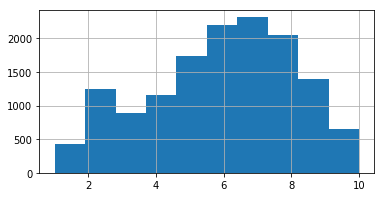

In [16]:
plt.figure(figsize=[6, 3])
pd.Series(num_unique_sites).hist();

### 2.2 Проверка гипотез
#### 2.2.1 Проверка гипотезы о нормальности распределения

* **гипотеза $H_0$:** число уникальных сайтов в каждой сессии из 10-ти подряд посещенных пользователем сайтов распределено нормально.

**Проверка гипотезы $H_0$ выполнена** с помощью QQ-plot и критерия Шапиро-Уилка:

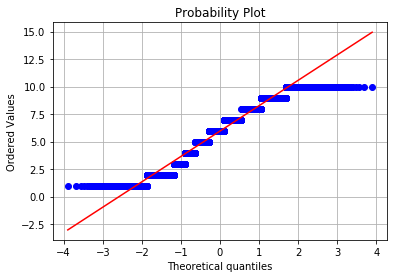

In [17]:
stats.probplot(num_unique_sites, dist='norm', plot=plt); plt.grid()

In [18]:
shap_wilk_crit = stats.shapiro(num_unique_sites)
print('Уровень значимости критерия Шапиро-Уилка равен = ', '%.16f' % shap_wilk_crit[1])

Уровень значимости критерия Шапиро-Уилка равен =  0.0000000000000000


**QQ-plot, ранее построенная** диаграмма распределения и полученный критерий Шапиро-Уилка показывают, что распределение величины числа уникальных сайтов в каждой сессии из 10-ти последовательно посещенных сайтов **не** является нормальным (удлиненные хвосты QQ-plot и p-value критерия Шапиро-Уилка). При этом, возможно, применение критерия Шапиро-Уилка не является оправданным, поскольку количество элементов в проверяемой выборке превышает 5000.

#### 2.2.2 Проверка гипотезы о значимости доли случаев повторного посещения сайтов в сессии

**Проверка гипотезы о том, что пользователь** хотя бы раз зайдет на сайт, который он уже ранее посетил в сессии из 10 сайтов. С помощью биномиального критерия для доли проверяется гипотеза, что доля случаев, когда пользователь повторно посетил какой-то сайт (то есть число уникальных сайтов в сессии < 10) велика: больше 95% (альтернатива тому, что доля равна 95% – одностороняя).

* **выборка:** бинарный вектор длины $n$, где 1 — пользователь повторно посетил какой-то сайт за сессию, 0 — не посетил;
* **гипотеза $H_0$:** доля случаев, когда пользователь повторно посетил какой-то сайт в каждой сессии, не превышает 95%;
* **статистика $T$:** количество единиц в выборке;
* **гипотеза $H_1$:** односторонняя альтернатива - доля случаев, когда пользователь повторно посетил какой-то сайт в каждой сессии, велика, больше 95%.

In [19]:
has_two_similar = (np.array(num_unique_sites) < 10).astype('int')
pi_val = stats.binom_test(sum(has_two_similar), len(has_two_similar), 0.95, alternative='greater')
print('p-value =', pi_val)

p-value = 0.02207653769072678


**Поскольку полученное значение p-value = 0.022,** на уровне значимости 0.05 мы можем отвергнуть гипотезу $H_0$ в пользу односторонней альтернативы - доля случаев повторного посещения пользователем какого-либо сайта в каждой сессии велика, больше 95%.

#### 2.2.3 Доверительный интервал Уилсона для доли случаев повторного посещения сайтов в сессии

**Построение 95% доверительного интервала Уилсона** для доли случаев, когда пользователь повторно посетил какой-то сайт (из п. 2.2.2):

In [20]:
wilson_interval = proportion_confint(sum(has_two_similar), len(has_two_similar), method = 'wilson')
print('Доверительный интервал Уилсона для доли повторного посещения сайтов в сессии: [{} {}]'.format(round(wilson_interval[0], 3), round(wilson_interval[1], 3)))

Доверительный интервал Уилсона для доли повторного посещения сайтов в сессии: [0.95 0.957]


#### 2.2.4 Распределение частоты посещения сайтов (посещенных более 1000 раз)

**Распределение частоты посещения сайтов** (сколько раз тот или иной сайт попадается в выборке) для сайтов, которые были посещены как минимум 1000 раз:

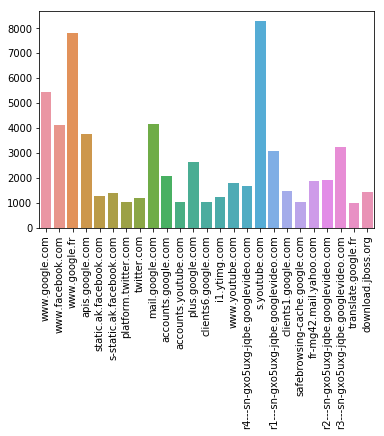

In [21]:
with open('site_freq_10users.pkl', 'rb') as site_freq_pkl:
    d_site_freq = pickle.load(site_freq_pkl)
d_site_freqs1000 = {site:d_site_freq[site] for site in d_site_freq if d_site_freq[site][1] >= 1000}
sns.barplot(list(d_site_freqs1000.keys()), list(map(lambda x: x[1], d_site_freqs1000.values()))); plt.xticks(rotation=90);

#### 2.2.5 Доверительный интервал для средней частоты появления сайтов в выборке на основе bootstrap

**Ниже представлено построение** 95% доверительного интервала для **средней** частоты появления сайта во всей выборке на основе bootstrap. При оценке доверительного интервала было использовано столько же bootstrap-подвыборок, сколько сайтов оказалось в исходной выборке по 10 пользователям.

In [22]:
def get_bootstrap_samples(data, n_samples, random_seed=17):
    np.random.seed(random_seed)
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

In [23]:
def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, 
                 [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [24]:
site_freqs = list(map(lambda x: x[1], d_site_freq.values()))
site_freqs_sorted = np.asarray(sorted(site_freqs, reverse=True))
site_freqs_sorted_mean_scores = list(map(np.mean, get_bootstrap_samples(site_freqs_sorted, site_freqs_sorted.shape[0])))
print("95% доверительный интервал для средней частоты появления сайта в выборке:",  stat_intervals(site_freqs_sorted_mean_scores, 0.05))

95% доверительный интервал для средней частоты появления сайта в выборке: [22.51524527 35.76303684]


**Таким образом, по результатам** первичного анализа данных из выборки для 10-ти пользователей было установлено следующее:
- закон распределения числа уникальных сайтов в каждой сессии не является нормальным (хотя визуально достаточно близок к нормальному);
- доля случаев, когда пользователь повторно посетил какой-то сайт в каждой сессии, составляет более 95% (с доверительным интервалом [0.95 0.957]);
- в выборке присутствуют сайты, которые были посещены более 1000 раз (за все сессии);
- доверительный интервал для средней частоты появления сайта в выборке составляет [22.51524527 35.76303684].

Далее будет выполнен первичный визуальный анализ данных (признаков) и построение признаков.

## 3. Визуальный анализ данных и построение признаков

### 3.1 Построение признаков
Проведенный ранее первичный анализ имеющихся в выборке признаков (а это частоты посещения сайтов, их идентификаторы) предоставил определенную информацию, необходимую для построения прогнозных моделей. Однако для визуального анализа представляется интересным достроить ряд признаков, возможно способных помочь в решении задачи идентификации конкретного пользователя. Построенные признаки далее будут исследованы (проанализированы).

**На основе функций** *prepare_train_set* и *prepare_sparse_train_set_window* создается новая – *prepare_train_set_with_fe*, (от "feature engineering"), которая позволяет извлечь из исходных данных следующие новые признаки:
- `session_timespan` – продолжительность сессии (разница между максимальным и минимальным временем посещения сайтов в сессии, в секундах);
- `#unique_sites` – число уникальных сайтов в сессии;
- `start_hour` – час начала сессии (то есть час в записи минимального timestamp среди десяти);
- `day_of_week` – день недели (то есть день недели в записи минимального timestamp среди десяти).

Функция возвращает новый DataFrame (как возвращала функция *prepare_train_set*), но с добавленными новыми 4-мя признаками. Порядок, в котором добавляются признаки: *site1*, ... *site10*, *session_timespan*, *#unique_sites*, *start_hour*, *day_of_week* и *user_id*.

In [25]:
def prepare_train_set_with_fe(path_to_csv_files, site_freq_path, feature_names, session_length=10, window_size=10):
    # считаем из pickle-файла словарь с сайтами, их идентификаторами и частотами посещений по всем пользователям в заданном каталоге
    with open(site_freq_path, 'rb') as site_freq_pkl:
        d_site_freq = pickle.load(site_freq_pkl) 
    
    files_pathes = glob(path_to_csv_files + '\\*.csv') # пути к файлам с данными пользователей в заданном каталоге

    # сформируем датафрейм с уникальными сессиями для пользователей
    df_train_data = pd.DataFrame(data=None, columns=feature_names) # датафрейм уникальных сессий всех пользователей
    
    if window_size <= 0: # проверим неотрицательность размера окна
        window_size = session_length
    
    for file_path in files_pathes:
        df = pd.read_csv(file_path) # считываем очередной файл в датафрейм
        ls_out = [] # список списков идентификаторов сайтов и новых признаков
        ls_site_ids = [d_site_freq[site][0] for site in df.site] # формируем список идентификаторов сайтов для всего считанного файла
        ls_timestamps = [pd.Timestamp(timestamp).timestamp() for timestamp in df.timestamp] # список timestamp для всего считанного файла
        ls_hours = [pd.Period(timestamp).hour for timestamp in df.timestamp] # список часов начала просмотра сайтов для всего считанного файла
        ls_days = [pd.Period(timestamp).dayofweek for timestamp in df.timestamp] # список дней недели начала просмотра сайтов для всего считанного файла
        
        ls_sample_indptrs = list(range(0, int(df.shape[0]/window_size + 0.5)*window_size, window_size)) # список индексов, 
                # начиная с которых необходимо будет выбирать идентификаторы сайтов из списка идентификаторов сайтов
        if (len(ls_site_ids) - window_size) > ls_sample_indptrs[-1]: # учитывает случаи, когда не посчитался последний нужный индекс для выборки
            ls_sample_indptrs.append(ls_sample_indptrs[-1] + window_size)
            
        for ind in ls_sample_indptrs: # текущая сессия с учетом окна
            ls_site_ids_temp = ls_site_ids[ind:ind+session_length] # идентификаторы сайтов в текущей сессии
            ls_timestamps_temp = ls_timestamps[ind:ind+session_length] # timestamps текущей сессии
            ls_hours_temp = ls_hours[ind:ind+session_length] # часы начала просмотра сайтов в текущей сессии
            ls_days_temp = ls_days[ind:ind+session_length] # дни недели начала просмотра сайтов в текущей сессии
            
            unique_sites = len(np.unique(ls_site_ids_temp)) # число уникальных сайтов в текущей сессии
            if len(ls_site_ids_temp) < session_length: # дополняем список идентификаторов сайтов текущей сессии нулями до размера session_length
                ls_site_ids_temp = ls_site_ids_temp + [0]*(session_length - len(ls_site_ids_temp))
            ls_site_ids_temp += [int(max(ls_timestamps_temp) - min(ls_timestamps_temp)), unique_sites,
                                 ls_hours_temp[np.argmin(ls_timestamps_temp)], ls_days_temp[np.argmin(ls_timestamps_temp)]] # добавляем продолжительность текущей сессии session_timespan,
                                # число уникальных сайтов в текущей сессии #unique_sites, час начала сессии, день начала сессии,
            ls_out.append(ls_site_ids_temp)

        df = pd.DataFrame(ls_out) # временный датафрейм уникальных сессий для текущего файла пользователя
        df[''] = int(file_path[-8:-4]) # идентификатор текущего пользователя
        df.columns = feature_names
        df_train_data = pd.concat([df_train_data, df]) # конкатенируем текущий датафрейм с датафреймом уникальных сессий - на возврат из функции

    df_train_data.index = range(df_train_data.shape[0])
            
    return df_train_data

In [26]:
feature_names = ['site' + str(i) for i in range(1,11)] + \
                ['session_timespan', '#unique_sites', 'start_hour', 'day_of_week', 'target']

**Применение функции** *prepare_train_set_with_fe* к данным по 10 пользователям, с длиной сессии *session_length*=10:

In [27]:
%%time
train_data_10users = prepare_train_set_with_fe(os.path.join(PATH_TO_DATA, '10users'),
                                               site_freq_path=os.path.join(PATH_TO_DATA, 'site_freq_10users.pkl'),
                                               feature_names=feature_names, session_length=10)

Wall time: 2min 23s


**Применение функции** *prepare_train_set_with_fe* к данным по 150 пользователям, с длиной сессии *session_length*=10:

<font color=crimson> Внимание! Время выполнения функции для выборки в 150 пользователей превышает 24 мин! </font>

In [28]:
%%time
train_data_150users = prepare_train_set_with_fe(os.path.join(PATH_TO_DATA, '150users'),
                                               site_freq_path=os.path.join(PATH_TO_DATA, 'site_freq_150users.pkl'),
                                               feature_names=feature_names, session_length=10)

Wall time: 24min 46s


**Сохранение в pickle-файлы признаков** *session_timespan*, *#unique_sites*, *start_hour* и *day_of_week* для 10 и 150 пользователей:

In [29]:
new_features_10users = train_data_10users.loc[:,'session_timespan':'day_of_week']
new_features_150users = train_data_150users.loc[:,'session_timespan':'day_of_week']
with open(os.path.join(PATH_TO_DATA, 'new_features_10users.pkl'), 'wb') as new_features_10users_pkl:
    pickle.dump(new_features_10users, new_features_10users_pkl)
with open(os.path.join(PATH_TO_DATA, 'new_features_150users.pkl'), 'wb') as new_features_150users_pkl:
    pickle.dump(new_features_150users, new_features_150users_pkl)

**Небольшой обобщенный первичный** анализ новых признаков:

In [30]:
print('Медианные значения: продолжительность сессии (10 польз) - {} sec, день начала сессии (10 польз) - {},\
      час начала сессии (150 польз) - {}, число уникальных сайтов в сессиях (150 польз) - {}'.format(np.median(new_features_10users.session_timespan),
                                                                                                    np.median(new_features_10users.day_of_week), np.median(new_features_150users.start_hour),
                                                                                                    np.median(new_features_150users['#unique_sites'])))

Медианные значения: продолжительность сессии (10 польз) - 37.0 sec, день начала сессии (10 польз) - 2.0,      час начала сессии (150 польз) - 13.0, число уникальных сайтов в сессиях (150 польз) - 7.0


### 3.2 Визуальный анализ данных (признаков)
Далее будет проведен визуальный анализ новых, построенных в 3.1, признаков. Для удобства и наглядности при проведении дальнейшего визуального анализа пользователям присваиваются имена и с ними ассоциируются с цвета:

In [28]:
id_name_dict = {128: 'Mary-Kate', 39: 'Ashley', 207: 'Lindsey', 127: 'Naomi', 237: 'Avril',
               33: 'Bob', 50: 'Bill', 31: 'John', 100: 'Dick', 241: 'Ed'}
train_data_10users['target'] = train_data_10users['target'].map(id_name_dict)
color_dic = {'Mary-Kate': 'pink', 'Ashley': 'darkviolet', 'Lindsey':'blueviolet', 
             'Naomi': 'hotpink', 'Avril': 'orchid', 
             'Bob': 'firebrick', 'Bill': 'gold', 'John': 'forestgreen', 
             'Dick': 'slategrey', 'Ed':'brown'}

#### 3.2.1 Гистограмма распределения длины сессии в секундах (*session_timespan*)

**При построении гистограммы** распределения длины сессии в секундах (*session_timespan*) из исходного датафрейма были выбраны значения меньше 200 с, а по оси *x* было также установлено ограничение тем же значением 200 с (можно проследить, что в области от 0 до 200 с сосредоточены основные значения длин сессий, а построение полной гистограммы занимает много времени, при необходимости достаточно раскомментировать закомментированные строчки).<br>
Здесь и далее: почему-то перестал применяться метод pd.hist(), а plt.hist() рисует гистограмму только, если на вход поданы данные в виде списка (list()), поэтому отрисовка диаграмм будет выполнена с помощью приведения данных к типу list().

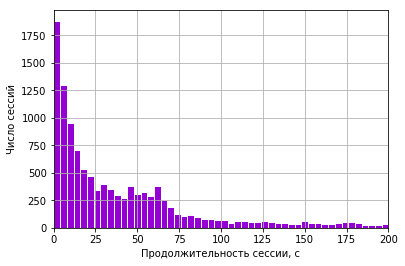

In [72]:
#plt.hist(train_data_10users['session_timespan'].values, bins=50, range=[0, 200],  facecolor='darkviolet')
#plt.xlim([0, 200]); plt.xlabel('Продолжительность сессии, с'); plt.ylabel('Число сессий');
plt.hist(list(filter(lambda x: x <= 200, train_data_10users['session_timespan'].values)), bins=50, facecolor='darkviolet', edgecolor='w');
plt.xlim([0, 200]); plt.xlabel('Продолжительность сессии, с'); plt.ylabel('Число сессий'); plt.grid();

#### 3.2.2 Гистограмма распределения числа уникальных сайтов в сессии (*#unique_sites*)

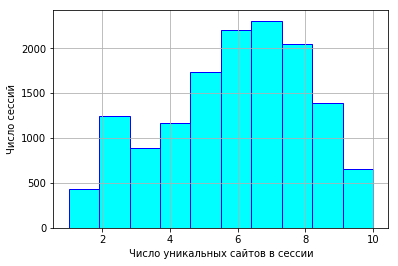

In [44]:
#train_data_10users['#unique_sites'].hist(bins=20, color='aqua')
#plt.xlabel('Число уникальных сайтов в сессии'); plt.ylabel('Число сессий');
plt.hist(list(train_data_10users['#unique_sites'].values), bins=10, facecolor='aqua', edgecolor='b')
plt.xlabel('Число уникальных сайтов в сессии'); plt.ylabel('Число сессий'); plt.grid()

#### 3.2.3 Гистограмма распределения числа уникальных сайтов в сессии (*#unique_sites*) по каждому из 10-ти пользователей

**Ниже представлены гистограммы** распределения числа уникальных сайтов в сессии (*#unique_sites*) для каждого из 10 пользователей по отдельности.

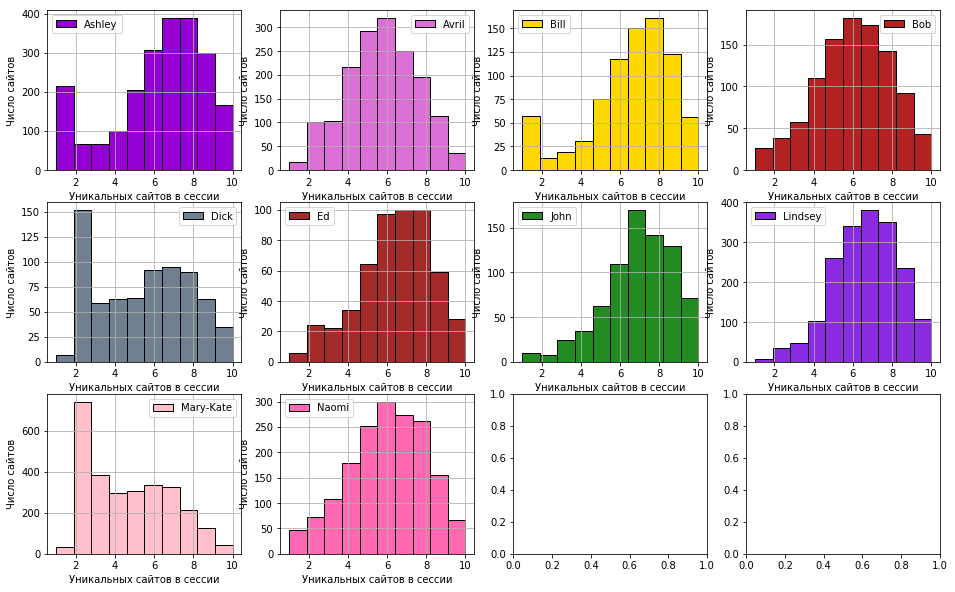

In [54]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 10));
for idx, (user, sub_df) in  enumerate(pd.groupby(train_data_10users, 'target')): 
    axes[idx//4, idx%4].hist(list(sub_df['#unique_sites']), color=color_dic[user], bins=10, edgecolor='black')
    axes[idx//4, idx%4].legend([user]); axes[idx//4, idx%4].set_xlabel('Уникальных сайтов в сессии'); axes[idx//4, idx%4].set_ylabel('Число сайтов'); axes[idx//4, idx%4].grid()

#### 3.2.4 Гистограмма распределения часа начала сессии (*start_hour*)

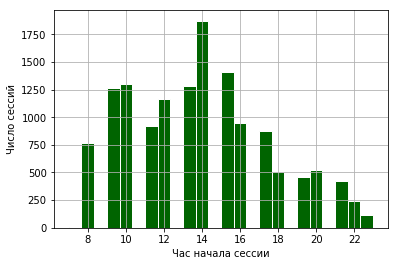

In [62]:
#train_data_10users['start_hour'].hist(bins=30, color='darkgreen')
#plt.xlabel('Час начала сессии'); plt.ylabel('Число сессий');
plt.hist(list(train_data_10users['start_hour'].values), bins=24, facecolor='darkgreen', edgecolor='w')
plt.xlabel('Час начала сессии'); plt.ylabel('Число сессий'); plt.grid()

#### 3.2.5 Гистограмма распределения часа начала сессии (*start_hour*) по каждому из 10-ти пользователей

**Ниже представлены гистограммы** распределения часа начала сессии (*start_hour*) для каждого из 10 пользователей по отдельности.

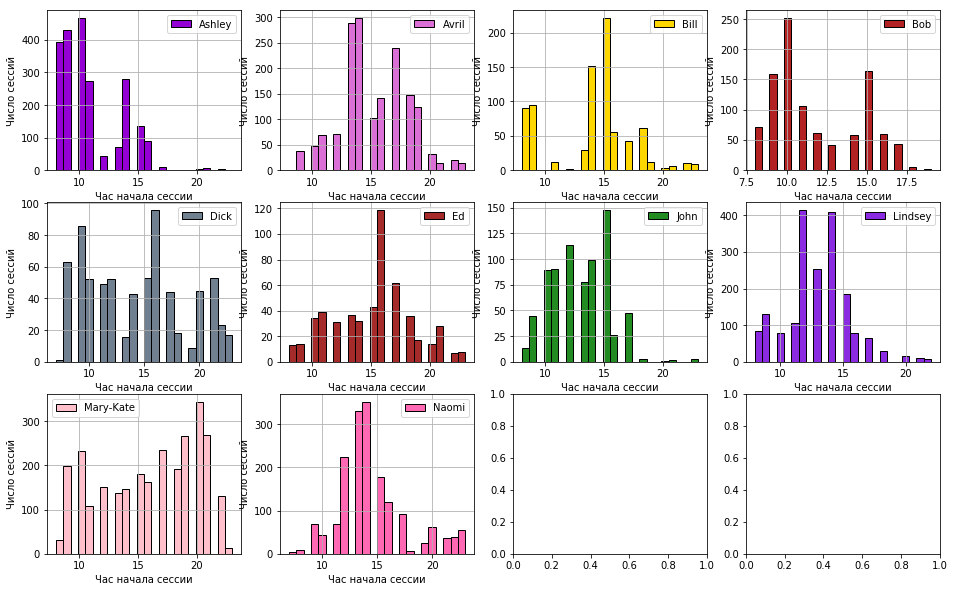

In [65]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 10))
for idx, (user, sub_df) in  enumerate(pd.groupby(train_data_10users, 'target')): 
    axes[idx//4, idx%4].hist(list(sub_df['start_hour']), color=color_dic[user], bins=24, edgecolor='black')
    axes[idx//4, idx%4].legend([user]); axes[idx//4, idx%4].set_xlabel('Час начала сессии'); axes[idx//4, idx%4].set_ylabel('Число сессий'); axes[idx//4, idx%4].grid();

#### 3.2.6 Гистограмма распределения дня недели начала сессии (*day_of_week*)

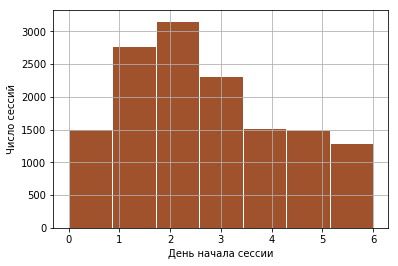

In [67]:
#train_data_10users['day_of_week'].hist(bins=20, color='sienna')
#plt.xlabel('День начала сессии'); plt.ylabel('Число сессий');
plt.hist(list(train_data_10users['day_of_week']), bins=7, facecolor='sienna', edgecolor='w')
plt.xlabel('День начала сессии'); plt.ylabel('Число сессий'); plt.grid()

#### 3.2.7 Гистограмма распределения дня недели начала сессии (*day_of_week*) по каждому из 10-ти пользователей

**Ниже представлены гистограммы** распределения дня недели начала сессии (*day_of_week*) для каждого из 10 пользователей по отдельности (при построении гистограмм метки по оси *X* были изменены на мнемонически осмысленные ['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс']).

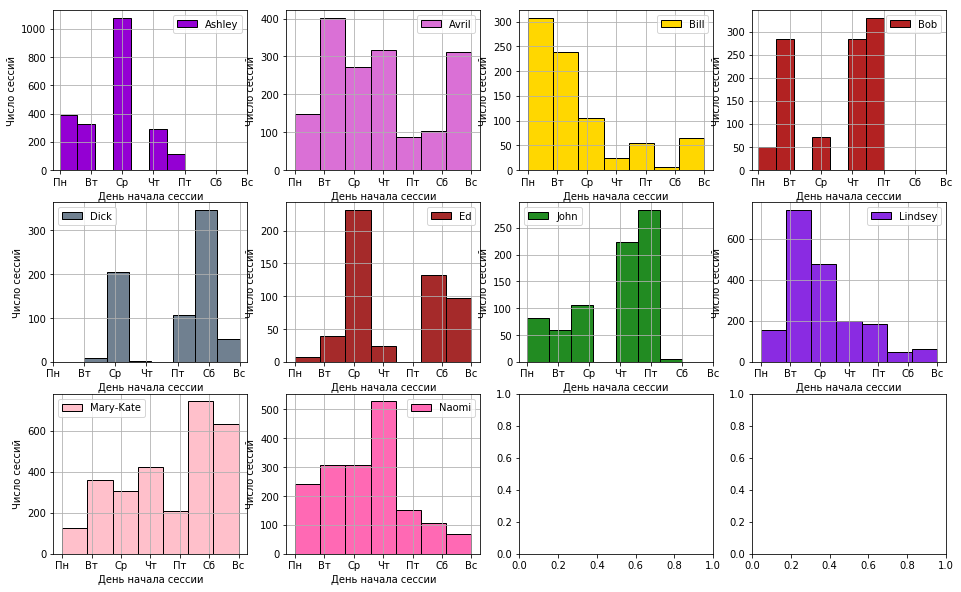

In [69]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 10))
ls_days = ['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс']
for idx, (user, sub_df) in  enumerate(pd.groupby(train_data_10users, 'target')): 
    axes[idx//4, idx%4].hist(list(sub_df['day_of_week']), color=color_dic[user], bins=7, edgecolor='black');
    axes[idx//4, idx%4].set_xticks(range(len(ls_days))); axes[idx//4, idx%4].set_xticklabels(ls_days)
    axes[idx//4, idx%4].legend([user]); axes[idx//4, idx%4].set_xlabel('День начала сессии'); axes[idx//4, idx%4].set_ylabel('Число сессий'); axes[idx//4, idx%4].grid()      

#### 3.2.8 Выводы о пользователях

**По построенным выше графикам** можно сделать следующие выводы о пользователях (для выборки из 10-ти пользователей):
- п.3.2.1) продолжительность большинства сессий по всем пользователям не превышает 1 минуты (60 с) (строго говоря, и того меньше - за время ок. 4 с в среднем пользователь успевает посетить несколько сайтов, разумеется, с повторным заходом на ряд из этих сайтов);
- п.3.2.2) число уникальных сайтов в каждой сессии по всем пользователям чаще всего равно 6-7;
- п.3.2.3) число уникальных сайтов в каждой сессии для конкретных пользователей так же чаще всего равно 6-7, за исключением пользователей Dick и Mary-Kate (эти пользователи, очевидно, предпочитают чаще заходить на одни и те же сайты);
- п.3.2.4) наиболее популярный час начала сессий по всем пользователям - 14:00;
- п.3.2.5) начало сессий для большинства пользователей приходится на время 14:00-16:00 (15:00 - визуально наиболее популярное время для начала сессий), но 2 пользователя (Ashley и Bob) предпочитают заходить на сайты в 10:00, а один пользователь (Mary-Kate) предпочитает посещать сайты вечером (пик приходится на 20:00) - можно предположить, что Mary-Kate днями очень занята, либо слишком ответственна и не заходит в интернет на работе, либо у нее вообще нет интернета на рабочем месте;
- п.3.2.6) наиболее популярный день для посещения сайтов по всем пользователям - среда (хотя далее, по каждому пользователю картина несколько иная);
- п.3.2.7) некоторые пользователи (Avril, Dick, Ed и Mary-Kate) проявляют б*О*льшую или достаточную активность в выходные, остальные препочитают посещать сайты в будние дни. При этом можно сказать, что наименее популярный день посещения сайтов у большинства пользователей - понедельник.

#### 3.2.9 Топ-10 посещаемых сайтов

**Загрузка ранее сохраненного** в pickle-файл частотного словаря сайтов для 10 пользователей и определение топ-10 самых посещаемых сайтов (*top10_sites*) и соответствующего кол-ва посещений этих сайтов (*top10_freqs*):

In [75]:
with open('site_freq_10users.pkl', 'rb') as site_freq_pkl:
    site_freq_10users = pickle.load(site_freq_pkl)
site_freq_10users_sorted = sorted(site_freq_10users.items(), key=operator.itemgetter(1))
top10_freqs = list(map(lambda x: x[1][1], site_freq_10users_sorted[0:10]))
top10_sites = list(map(lambda x: x[0], site_freq_10users_sorted[0:10]))

**Ниже представлен** *seaborn barplot*, показывающий частоты посещений топ-10 сайтов.

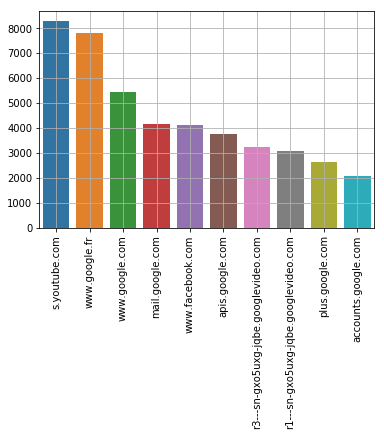

In [79]:
sns.barplot(x=top10_sites, y=top10_freqs); plt.xticks(rotation=90); plt.grid()

### 3.3 Построение и визуальный анализ дополнительных признаков

#### 3.3.1 Построение дополнительных признаков

Поскольку далее будут построены модели для классификации сессий по принадлежности разным пользователям, возможно, что будет иметь смысл добавить созданные новые признаки в обучающие выборки при построении моделей и посмотреть, улучшается ли модель. Признаки создаются в виде отдельных матриц и сохраняются отдельно.<br>
Ниже разработана функция *feature_engineering* для создания нового признака - медианного времени пребывания в сессии, где само время пребывания в сессии считается по разности соседних timestamps-ов (разность между заходами пользователя на два соседних сайта). Функция была применена к исходным данным – каталогам с 10 и 150 файлами. Сделано это было только для набора данных, полученного с параметрами *session_length=10* и *window_size=10*. Затем полученные матрицы были сериализованы с помощью pickle.

In [80]:
def feature_engineering(path_to_csv_files, site_freq_path, feature_names, session_length=10, window_size=10):
    # считаем из pickle-файла словарь с сайтами, их идентификаторами и частотами посещений
    # по всем пользователям в заданном каталоге
    with open(site_freq_path, 'rb') as site_freq_pkl:
        d_site_freq = pickle.load(site_freq_pkl) 
    
    files_pathes = glob(path_to_csv_files + '\\*.csv') # пути к файлам с данными пользователей в заданном каталоге

    # сформируем датафрейм с уникальными сессиями для пользователей
    if window_size <= 0: # проверим положительность размера окна
        window_size = session_length
    
    ls_timesites_median = [] # список медианных значений времени пребывания на сайтах по всем сессиям всех пользователей
            # время пребывания на сайте считается по разности соседних timestamps
    ls_user_id = [] # список идентификаторов пользователей
    
    for file_path in files_pathes:
        df = pd.read_csv(file_path) # считываем очередной файл в датафрейм
        ls_site_ids = [d_site_freq[site][0] for site in df.site] # формируем список идентификаторов сайтов для всего считанного файла
        ls_timestamps = [pd.Timestamp(timestamp).timestamp() for timestamp in df.timestamp] # список timestamp для всего считанного файла
        
        ls_sample_indptrs = list(range(0, int(df.shape[0]/window_size + 0.5)*window_size, window_size)) # список индексов, 
                # начиная с которых необходимо будет выбирать идентификаторы сайтов из списка идентификаторов сайтов
        if (len(ls_site_ids) - window_size) > ls_sample_indptrs[-1]: # учитывает случаи, когда не посчитался последний нужный индекс для выборки
            ls_sample_indptrs.append(ls_sample_indptrs[-1] + window_size)
        ls_timesites_median += [np.median(list(map(lambda x,y: y-x, ls_timestamps[ind:ind+session_length], ls_timestamps[ind:ind+session_length][1:]))) for ind in ls_sample_indptrs]
        ls_user_id += [int(file_path[-8:-4])]*len(ls_sample_indptrs)
        
    df_train_data = pd.DataFrame(list(zip(ls_timesites_median, ls_user_id)))
    df_train_data.columns = feature_names
    df_train_data.index = range(df_train_data.shape[0])

    return df_train_data

In [81]:
feature_names = ['median_time', 'target']

In [94]:
%%time
new_features_10users = feature_engineering(os.path.join(PATH_TO_DATA, '10users'), site_freq_path=os.path.join(PATH_TO_DATA, 'site_freq_10users.pkl'),
                                           feature_names=feature_names, session_length=10)
new_features_150users = feature_engineering(os.path.join(PATH_TO_DATA, '150users'), site_freq_path=os.path.join(PATH_TO_DATA, 'site_freq_150users.pkl'),
                                           feature_names=feature_names, session_length=10)

Wall time: 10.7 s


#### 3.3.2 Визуальный анализ дополнительных признаков

**Ниже представлены гистограммы** распределения медианного значения времени пребывания на сайте по всем пользователям (для выборок из 10-ти и 150-ти пользователей).

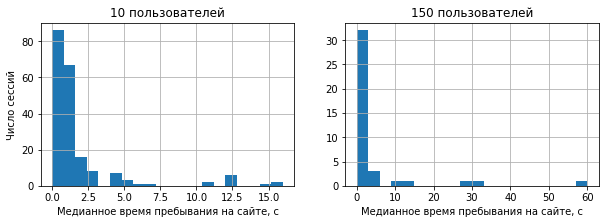

In [101]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,3))
axes[0].hist(new_features_10users['median_time'][0:200], bins=20); axes[0].set_xlabel('Медианное время пребывания на сайте, с'); axes[0].set_ylabel('Число сессий')
axes[0].set_title('10 пользователей'); axes[1].set_title('150 пользователей'); axes[0].grid(); axes[1].grid()
axes[1].hist(new_features_150users['median_time'][0:40], bins=20); axes[1].set_xlabel('Медианное время пребывания на сайте, с');

**Гистограмма распределения** медианного значения времени пребывания на сайте по каждому пользователю для выборки из 10-ти пользователей:

In [102]:
new_features_10users['target'] = new_features_10users['target'].map(id_name_dict)

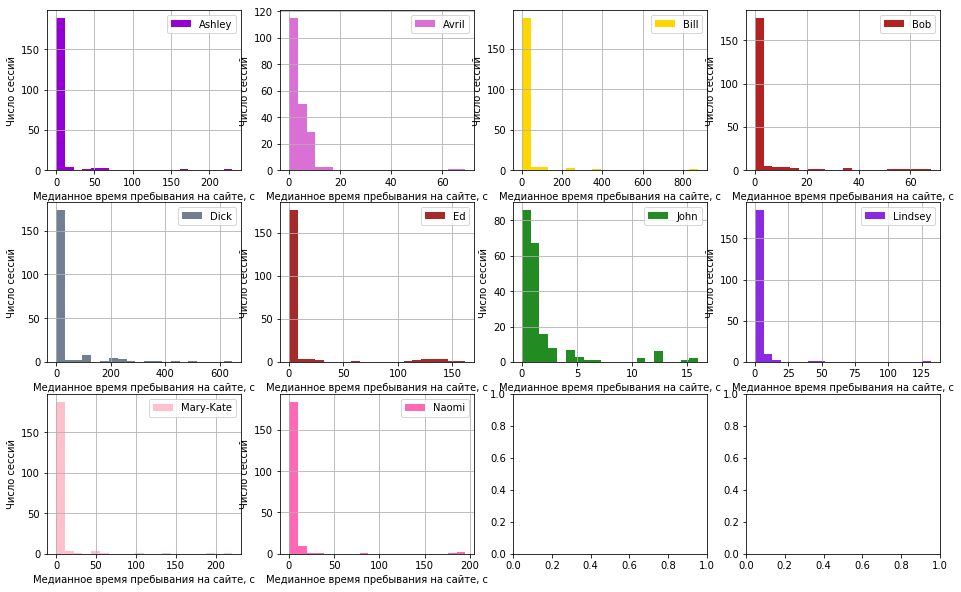

In [105]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 10))
for idx, (user, sub_df) in  enumerate(pd.groupby(new_features_10users, 'target')): 
    axes[idx//4, idx%4].hist(sub_df['median_time'][0:200], color=color_dic[user], bins=20);
    axes[idx//4, idx%4].legend([user]); axes[idx//4, idx%4].set_xlabel('Медианное время пребывания на сайте, с'); axes[idx//4, idx%4].set_ylabel('Число сессий'); axes[idx//4, idx%4].grid()    

**По построенным диаграммам** можно сделать вывод, что медианное время пребывания на сайте для каждого пользователя сосредоточено в районе 4-10 с. Возможно, это не самый эффективный признак с точки зрения улучшения модели идентификации пользователей, необходимость его применения для данной задачи будет оценена позднее.

**Сохранение дополнительных** признаков в pickle-файлы:

In [106]:
selected_features_10users = new_features_10users.median_time 
selected_features_150users = new_features_150users.median_time 
with open(os.path.join(PATH_TO_DATA, 'selected_features_10users.pkl'), 'wb') as selected_features_10users_pkl:
    pickle.dump(selected_features_10users, selected_features_10users_pkl, protocol=2)
with open(os.path.join(PATH_TO_DATA, 'selected_features_150users.pkl'), 'wb') as selected_features_150users_pkl:
    pickle.dump(selected_features_150users, selected_features_150users_pkl, protocol=2)

**Таким образом, по исходным данным** для выборок из 10-ти и 150-ти пользователей были построены новые (и дополнительные) признаки и проведен их первичный визуальный анализ, который позволил выявить определенные сходства и различия в признаках для различных пользователей (день недели и час начала сессии, количество повторных посещений сайтов и т.п.).<br>
Далее будет проведен выбор, обучение и сравнение различных моделей классификации.

## 4. Сравнение алгоритмов классификации

**В этом разделе будет выполнено** обучение нескольких моделей классификации, сравнение на кросс-валидации нескольких алгоритмов, и анализ того, какие параметры длины сессии (*session_length* и *window_size*) лучше использовать. Также для выбранного алгоритма будут построены кривые валидации (как качество классификации зависит от одного из гиперпараметров алгоритма) и кривые обучения (как качество классификации зависит от объема выборки).

### 4.1 Сравнение алгоритмов (моделей) на сессиях из 10-ти сайтов

#### 4.1.0 Подготовка данных
Для обучения моделей классификации необходимо подготовить соответствующим образом обучающую и тестовую (валидационную) выборки, а также задать тип кросс-валидации.

**Сериализованные ранее объекты** *X_sparse_10users* и *y_10users*, соответствующие обучающей выборке для 10 пользователей:

In [109]:
with open(os.path.join(PATH_TO_DATA, 'X_sparse_10users.pkl'), 'rb') as X_sparse_10users_pkl:
    X_sparse_10users = pickle.load(X_sparse_10users_pkl)
with open(os.path.join(PATH_TO_DATA, 'y_10users.pkl'), 'rb') as y_10users_pkl:
    y_10users = pickle.load(y_10users_pkl)

**Здесь более 14 тысяч сессий** и почти 5 тысяч уникальных посещенных сайтов.

In [110]:
X_sparse_10users.shape

(14061, 4913)

**Выборка делится на 2 части.** На одной будет проводиться кросс-валидация, на второй – оцениваться модель, обученная после кросс-валидации.

In [111]:
X_train, X_valid, y_train, y_valid = train_test_split(X_sparse_10users, y_10users, test_size=0.3, random_state=17, stratify=y_10users)

**Задается тип кросс-валидации:** 3-кратная, с перемешиванием, параметр random_state=17 – для воспроизводимости:

In [112]:
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=17)

**Вспомогательная функция** для отрисовки кривых валидации после запуска GridSearchCV (или RandomizedCV):

In [113]:
def plot_validation_curves(param_values, grid_cv_results_):
    train_mu, train_std = grid_cv_results_['mean_train_score'], grid_cv_results_['std_train_score']
    valid_mu, valid_std = grid_cv_results_['mean_test_score'], grid_cv_results_['std_test_score']
    train_line = plt.plot(param_values, train_mu, '-', label='train', color='green')
    valid_line = plt.plot(param_values, valid_mu, '-', label='test', color='red')
    plt.fill_between(param_values, train_mu - train_std, train_mu + train_std, edgecolor='none',
                     facecolor=train_line[0].get_color(), alpha=0.2)
    plt.fill_between(param_values, valid_mu - valid_std, valid_mu + valid_std, edgecolor='none',
                     facecolor=valid_line[0].get_color(), alpha=0.2)
    plt.legend()

#### 4.1.1 Метод K ближайших соседей (`KNeighborsClassifier`)
**Будет обучена модель `KNeighborsClassifier`** со 100 ближайшими соседями (остальные параметры остаются по умолчанию, только `n_jobs`=-1 для распараллеливания) и посчитана доля правильных ответов на 3-кратной кросс-валидации (ради воспроизводимости для этого используется объект `StratifiedKFold` `skf`) по выборке `(X_train, y_train)` и отдельно на выборке `(X_valid, y_valid)`.

In [115]:
knn = KNeighborsClassifier(n_neighbors=100, n_jobs=-1)
knn.fit(X_train, y_train.astype(int)) # обучение классификатора
knn_prediction = knn.predict(X_valid) # применение обученного классификатора для предсказания по отложенной выборке
knn_valid_score = accuracy_score(y_valid.astype(int), knn_prediction) # оценка качества на отложенной выборке
knn_cv_score = cross_val_score(knn, X_train, y_train.astype(int), scoring='accuracy', cv=skf).mean() # оценка по кроссвалидации
print('Качество классификации на отложенной выборке: {}, на кросс-валидации: {}'.format(knn_valid_score, knn_cv_score))

Качество классификации на отложенной выборке: 0.584024650391088, на кросс-валидации: 0.5647188870063362


#### 4.1.2 Метод случайного леса (`RandomForestClassifier`)
**Будет обучена модель случайного леса** (`RandomForestClassifier`) из 100 деревьев (для воспроизводимости `random_state`=17) и посчитана доля правильных ответов для `RandomForestClassifier` при Out-of-Bag оценке и на отложенной выборке `(X_valid, y_valid)`.

In [121]:
forest = RandomForestClassifier(n_estimators=100, random_state=17, oob_score=True, n_jobs=-1)
forest.fit(X_train, y_train.astype(int)) # обучение классификатора
forest_prediction = forest.predict(X_valid) # применение обученного классификатора для предсказания по отложенной выборке
forest_valid_score = accuracy_score(y_valid.astype(int), forest_prediction) # оценка качества на отложенной выборке
print('Качество классификации на отложенной выборке: {}, на Out-of-Bag оценке: {}'.format(forest_valid_score, forest.oob_score_))

Качество классификации на отложенной выборке: 0.7312159279450107, на Out-of-Bag оценке: 0.7172322698638488


#### 4.1.3 Метод логистической регрессии (`RandomForestClassifier`)
**Будет обучена модель логистической регрессии** (`LogisticRegression`) с параметром `C` по умолчанию и `random_state`=17 (для воспроизводимости) и посчитана доля правильных ответов на 3-кратной кросс-валидации (ради воспроизводимости используется объект `skf`, созданный ранее) и на выборке `(X_valid, y_valid)`.

In [127]:
logit = LogisticRegression(random_state=17, n_jobs=-1)
logit.fit(X_train, y_train.astype(int))
logit_prediction = logit.predict(X_valid) # применение обученного классификатора для предсказания по отложенной выборке
logit_valid_score = accuracy_score(y_valid.astype(int), logit_prediction) # оценка качества на отложенной выборке
logit_cv_score = cross_val_score(logit, X_train, y_train.astype(int), scoring='accuracy', cv=skf).mean() # оценка на кроссвалидации)
print('Качество классификации на отложенной выборке: {}, на кросс-валидации: {}'.format(logit_valid_score, logit_cv_score))

Качество классификации на отложенной выборке: 0.7817018250770325, на кросс-валидации: 0.7610267543665875


**Далее осуществляется** подбор параметра регуляризации `C` с помощью функции [LogisticRegressionCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html) (она работает быстрее, чем функция `GridSearchCV`). С помощью `LogisticRegressionCV` будет подобран параметр `C` для `LogisticRegression`, сначала в широком диапазоне: 10 значений от 1e-4 до 1e2. У `LogisticRegressionCV` установлены параметры `multi_class`='multinomial' и `random_state`=17. Для кросс-валидации используется объект `skf`, созданный ранее. Для распараллеливания задано `n_jobs=-1`.<br>
После подбора приведены кривые валидации по параметру `C`.

Wall time: 10.8 s


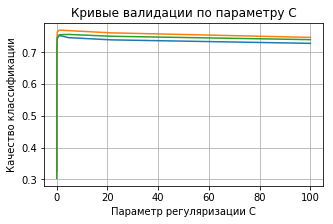

In [136]:
%%time
logit_c_values1 = np.logspace(-4, 2, 10)
logit_grid_searcher1 = LogisticRegressionCV(Cs=logit_c_values1, cv=skf, multi_class='multinomial', random_state=17, n_jobs=-1) 
logit_grid_searcher1.fit(X_train, y_train.astype(int))
plt.figure(figsize=[5,3]); plt.title('Кривые валидации по параметру C'); plt.xlabel('Параметр регуляризации C'); plt.ylabel('Качество классификации'); plt.grid()
for row in logit_grid_searcher1.scores_[31]:
    plt.plot(logit_c_values1, row); 

**Средние значения** доли правильных ответов на кросс-валидации по каждому из 10 параметров `C`:

In [137]:
logit_mean_cv_scores1 = logit_grid_searcher1.scores_[31].mean(axis=0)

**Лучшее значение** доли правильных ответов на кросс-валидации и соответствующее значение `C`:

In [138]:
print('Лучшее значение доли правильных ответов на кросс-валидации = {} \n соответствующий этому значению параметр C = {}'.format(max(logit_mean_cv_scores1), logit_c_values1[np.argmax(logit_mean_cv_scores1)]))

Лучшее значение доли правильных ответов на кросс-валидации = 0.7590970965314504 
 соответствующий этому значению параметр C = 1.0


**График зависимости** доли правильных ответов на кросс-валидации от `C`:

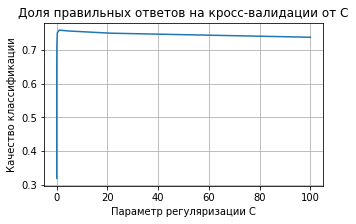

In [139]:
plt.figure(figsize=[5,3]); plt.plot(logit_c_values1, logit_mean_cv_scores1); plt.title('Доля правильных ответов на кросс-валидации от C')
plt.xlabel('Параметр регуляризации C'); plt.ylabel('Качество классификации'); plt.grid()

**Далее снова осуществляется** подбор параметра регуляризации `C` с помощью функции `LogisticRegressionCV`, но теперь в диапазоне `np.linspace`(0.1, 7, 20).<br>
После подбора приведены кривые валидации по параметру `C`.

Wall time: 29.6 s


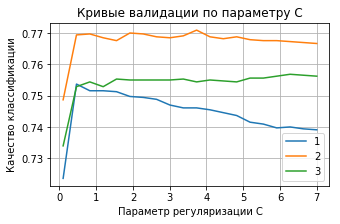

In [140]:
%%time
logit_c_values2 = np.linspace(0.1, 7, 20)
logit_grid_searcher2 = LogisticRegressionCV(Cs=logit_c_values2, cv=skf, multi_class='multinomial', random_state=17, n_jobs=-1)
logit_grid_searcher2.fit(X_train, y_train.astype(int))
row_num = 1
plt.figure(figsize=[5,3]); plt.title('Кривые валидации по параметру C'); plt.xlabel('Параметр регуляризации C'); plt.ylabel('Качество классификации'); plt.grid()
for row in logit_grid_searcher2.scores_[31]:
    plt.plot(logit_c_values2, row, label=row_num); row_num += 1; plt.legend()

**Средние значения** доли правильных ответов на кросс-валидации по каждому из 10 параметров `C`:

In [141]:
logit_mean_cv_scores2 = logit_grid_searcher2.scores_[31].mean(axis=0)

**Лучшее значение** доли правильных ответов на кросс-валидации и соответствующее значение `C`:

In [143]:
print('Лучшее значение доли правильных ответов на кросс-валидации = {} \n соответствующий этому значению параметр C = {}'.format(max(logit_mean_cv_scores2), logit_c_values2[np.argmax(logit_mean_cv_scores2)]))

Лучшее значение доли правильных ответов на кросс-валидации = 0.7586896943864367 
 соответствующий этому значению параметр C = 0.4631578947368421


**График зависимости** доли правильных ответов на кросс-валидации от `C`:

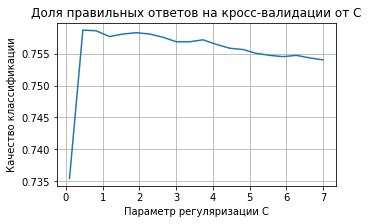

In [144]:
plt.figure(figsize=[5,3]); plt.plot(logit_c_values2, logit_mean_cv_scores2); plt.title('Доля правильных ответов на кросс-валидации от C')
plt.xlabel('Параметр регуляризации C'); plt.ylabel('Качество классификации'); plt.grid()

**Доля правильных ответов** на выборке `(X_valid, y_valid)` для логистической регрессии с лучшим найденным значением `C` (несмотря на то, что по значению качества классификации лучшим оказалось C=1.0, "правильным" с точки зрения выполнения данного задания, считалось значение C=0.4631578947368421, поэтому далее будет обучена модель логрегрессии с этим значением C) (доли правильных ответов для `logit_grid_searcher2` на кросс-валидации для лучшего значения параметра `C` и на отложенной выборке):

In [146]:
logit2 = LogisticRegression(random_state=17, n_jobs=-1, C=0.4631578947368421)
logit2.fit(X_train, y_train.astype(int))
logit_prediction2 = logit2.predict(X_valid) # применение обученного классификатора для предсказания по отложенной выборке
logit_valid_score2 = accuracy_score(y_valid.astype(int), logit_prediction2) # оценка качества на отложенной выборке
logit_cv_score2 = cross_val_score(logit2, X_train, y_train.astype(int), scoring='accuracy', cv=skf).mean() # оценка на кроссвалидации)
print('Качество классификации на отложенной выборке: {}, на кросс-валидации: {}'.format(logit_valid_score2, logit_cv_score2))

Качество классификации на отложенной выборке: 0.772931974401517, на кросс-валидации: 0.7562517204931455


#### 4.1.4 Метод линейный SVM (LinearSVC)
**Будет обучена модель метода опорных векторов SVM** (`LinearSVC`) с параметром `C`=1 и `random_state`=17 (для воспроизводимости) и посчитана доля правильных ответов на 3-кратной кросс-валидации (ради воспроизводимости используется объект `skf`, созданный ранее) и на выборке `(X_valid, y_valid)`.

In [148]:
svm = LinearSVC(random_state=17, C=1.0)
svm.fit(X_train, y_train.astype(int)) # обучение классификатора
svm_prediction = svm.predict(X_valid) # применение обученного классификатора для предсказания по отложенной выборке
svm_valid_score = accuracy_score(y_valid.astype(int), svm_prediction) # оценка качества на отложенной выборке
svm_cv_score = cross_val_score(svm, X_train, y_train.astype(int), scoring='accuracy', cv=skf).mean() # оценка на кроссвалидации
print('Качество классификации на отложенной выборке: {}, на кросс-валидации: {}'.format(svm_valid_score, svm_cv_score))

Качество классификации на отложенной выборке: 0.7769613652524295, на кросс-валидации: 0.7527976723012523


**Далее осуществляется** подбор параметра регуляризации `C` для SVM с помощью функции `GridSearchCV`, сначала в широком диапазоне: 10 значений от 1e-4 до 1e4.<br>
После подбора приведены кривые валидации по параметру `C`.

Wall time: 58.7 s


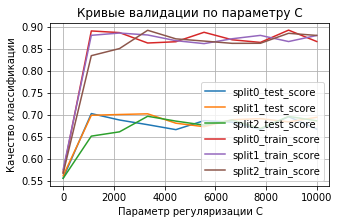

In [149]:
%%time
svm_params1 = {'C': np.linspace(1e-4, 1e4, 10)}
svm_grid_searcher1 = GridSearchCV(svm, param_grid=svm_params1)
svm_grid_searcher1.fit(X_train, y_train.astype(int))
plt.figure(figsize=[5,3]); plt.title('Кривые валидации по параметру C'); plt.xlabel('Параметр регуляризации C'); plt.ylabel('Качество классификации'); plt.grid()
for i in [6,7,8,12,13,14]:
    plt.plot(svm_params1['C'], svm_grid_searcher1.cv_results_[list(svm_grid_searcher1.cv_results_.keys())[i]],
             label=list(svm_grid_searcher1.cv_results_.keys())[i]); plt.legend(loc='lower right')

**Лучшее значение** доли правильных ответов на кросс-валидации и соответствующее значение `C`:

In [150]:
print('Лучшее значение доли правильных ответов на кросс-валидации = {} \n соответствующий этому значению параметр C = {}'.format(svm_grid_searcher1.best_score_, svm_grid_searcher1.best_params_['C']))

Лучшее значение доли правильных ответов на кросс-валидации = 0.692237350132087 
 соответствующий этому значению параметр C = 3333.3334000000004


**График зависимости** доли правильных ответов на кросс-валидации от `C`:

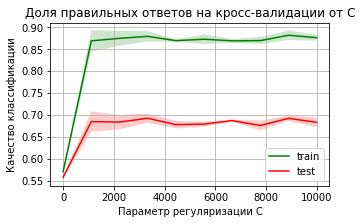

In [152]:
plt.figure(figsize=[5,3]); plot_validation_curves(svm_params1['C'], svm_grid_searcher1.cv_results_); plt.title('Доля правильных ответов на кросс-валидации от C')
plt.xlabel('Параметр регуляризации C'); plt.ylabel('Качество классификации'); plt.grid()

**Необходимо учесть,** что с параметром регуляризации по умолчанию (С=1) на кросс-валидации доля правильных ответов выше. Это тот случай (не редкий), когда можно ошибиться и перебирать параметры не в том диапазоне (причина в том, что была взята равномерная сетка на большом интервале и упущен действительно хороший интервал значений `C`). Таким образом, намного осмысленней подбирать `C` в районе 1, к тому же, так модель быстрее обучается, чем при больших `C`.

**Учитывая отмеченное, далее** с помощью `GridSearchCV` подбирается параметр `C` для SVM в диапазоне (1e-3, 1), 30 значений и приводятся кривые валидации.

Wall time: 37.1 s


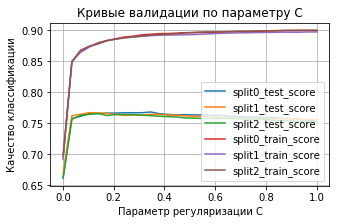

In [153]:
%%time
svm_params2 = {'C': np.linspace(1e-3, 1, 30)}
svm_grid_searcher2 = GridSearchCV(svm, param_grid=svm_params2, n_jobs=-1)
svm_grid_searcher2.fit(X_train, y_train.astype(int))
plt.figure(figsize=[5,3]); plt.title('Кривые валидации по параметру C'); plt.xlabel('Параметр регуляризации C'); plt.ylabel('Качество классификации'); plt.grid()
for i in [6,7,8,12,13,14]:
    plt.plot(svm_params2['C'], svm_grid_searcher2.cv_results_[list(svm_grid_searcher2.cv_results_.keys())[i]],
             label=list(svm_grid_searcher2.cv_results_.keys())[i]); plt.legend(loc='lower right')

**Лучшее значение** доли правильных ответов на кросс-валидации и соответствующее значение `C`:

In [154]:
print('Лучшее значение доли правильных ответов на кросс-валидации = {} \n соответствующий этому значению параметр C = {}'.format(svm_grid_searcher2.best_score_, svm_grid_searcher2.best_params_['C']))

Лучшее значение доли правильных ответов на кросс-валидации = 0.7661044503149766 
 соответствующий этому значению параметр C = 0.13879310344827586


**График зависимости** доли правильных ответов на кросс-валидации от `C`:

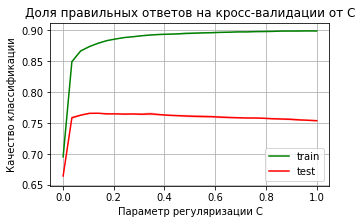

In [155]:
plt.figure(figsize=[5,3]); plot_validation_curves(svm_params2['C'], svm_grid_searcher2.cv_results_); plt.title('Доля правильных ответов на кросс-валидации от C')
plt.xlabel('Параметр регуляризации C'); plt.ylabel('Качество классификации'); plt.grid()

**Доля правильных ответов** на выборке `(X_valid, y_valid)` для `LinearSVC` с лучшим найденным значением `C` (значение C=0.13879310344827586, поэтому далее будет обучена модель SVM с этим значением C) (доли правильных ответов для `LinearSVC` на кросс-валидации для лучшего значения параметра `C` и на отложенной выборке):

In [157]:
svm2 = LinearSVC(random_state=17, C=0.13879310344827586)
svm2.fit(X_train, y_train.astype(int)) # обучение классификатора
svm_prediction2 = svm2.predict(X_valid) # применение обученного классификатора для предсказания по отложенной выборке
svm_valid_score2 = accuracy_score(y_valid.astype(int), svm_prediction2) #holdout_score - оценка качества на отложенной выборке
svm_cv_score2 = cross_val_score(svm2, X_train, y_train.astype(int), scoring='accuracy', cv=skf).mean() # оценка на кроссвалидации)
print('Качество классификации на отложенной выборке: {}, на кросс-валидации: {}'.format(svm_valid_score2, svm_cv_score2))

Качество классификации на отложенной выборке: 0.7817018250770325, на кросс-валидации: 0.7633649590115557


### 4.2 Выбор параметров - длины сессии и ширины окна

**Для проведения исследований** выбран `LinearSVC`, показавший лучшее качество на кросс-валидации в 1 части, после чего его работа проверена еще на 8 выборках для 10 пользователей (с разными сочетаниями параметров *session_length* и *window_size*). Поскольку требуется выполнить достаточно много вычислений, параметр регуляризации `C` не будет подбираться заново.<br>
Для выполнения исследований ниже определена функция `model_assessment`.

In [158]:
def model_assessment(estimator, path_to_X_pickle, path_to_y_pickle, cv, random_state=17, test_size=0.3):
    '''
    Estimates CV-accuracy for (1 - test_size) share of (X_sparse, y) 
    loaded from path_to_X_pickle and path_to_y_pickle and holdout accuracy for (test_size) share of (X_sparse, y).
    The split is made with stratified train_test_split with params random_state and test_size.
    
    :param estimator – Scikit-learn estimator (classifier or regressor)
    :param path_to_X_pickle – path to pickled sparse X (instances and their features)
    :param path_to_y_pickle – path to pickled y (responses)
    :param cv – cross-validation as in cross_val_score (use StratifiedKFold here)
    :param random_state –  for train_test_split
    :param test_size –  for train_test_split
    
    :returns mean CV-accuracy for (X_train, y_train) and accuracy for (X_valid, y_valid) where (X_train, y_train)
    and (X_valid, y_valid) are (1 - test_size) and (testsize) shares of (X_sparse, y).
    '''
    
    ''' ВАШ КОД ЗДЕСЬ '''
    t1 = time()
    with open(path_to_X_pickle, 'rb') as X_pkl:
        X_sparse = pickle.load(X_pkl)
    with open(path_to_y_pickle, 'rb') as y_pkl:
        y = pickle.load(y_pkl)
    X_train, X_valid, y_train, y_valid = train_test_split(X_sparse, y, test_size=test_size, random_state=random_state, stratify=y)
    svm = LinearSVC(random_state=random_state, C=0.13879310344827586) # C=1.0
    svm.fit(X_train, y_train.astype(int)) # обучаем классификатор
    svm_prediction = svm.predict(X_valid) # применение обученного классификатора для предсказания по отложенной выборке
    svm_cv_score = cross_val_score(svm, X_train, y_train.astype(int), scoring='accuracy', cv=cv).mean() # оценка на кроссвалидации)
    svm_cv_valid = accuracy_score(y_valid.astype(int), svm_prediction) # оценка качества на отложенной выборке
    
    return svm_cv_score, svm_cv_valid, time()-t1

**Далее созданная функция** *model_assessment* применяется для лучшего алгоритма из предыдущей части (а именно, `svm_grid_searcher2.best_estimator_`) и 9 выборок вида с разными сочетаниями параметров *session_length* и *window_size* для 10 пользователей. В цикле выводятся параметры *session_length* и *window_size*, а также результат вывода функции *model_assessment*.<br>
Функция *model_assessment* возвращает 3-им элементом время, за которое она выполнилась.

Здесь для удобства создаются копии ранее созданных pickle-файлов X_sparse_10users.pkl, X_sparse_150users.pkl, y_10users.pkl и y_150users.pkl, с добавлением к их названиям s10_w10, что означает длину сессии 10 и ширину окна 10:

In [160]:
%system copy /b X_sparse_10users.pkl X_sparse_10users_s10_w10.pkl
%system copy /b X_sparse_150users.pkl X_sparse_150users_s10_w10.pkl
%system copy /b y_10users.pkl y_10users_s10_w10.pkl
%system copy /b y_150users.pkl y_150users_s10_w10.pkl;

['‘Є®ЇЁа®ў\xa0\xad® д\xa0©«®ў:         1.']

In [161]:
%%time
estimator = svm_grid_searcher2.best_estimator_
for window_size, session_length in itertools.product([10, 7, 5], [15, 10, 7, 5]):
    if window_size <= session_length:
        path_to_X_pkl = os.path.join(PATH_TO_DATA, 'X_sparse_10users_s' + str(session_length) + '_w' + str(window_size) + '.pkl')
        path_to_y_pkl = os.path.join(PATH_TO_DATA, 'y_10users_s' + str(session_length) + '_w' + str(window_size) + '.pkl')
        res = model_assessment(estimator, path_to_X_pkl, path_to_y_pkl, cv=skf, random_state=17, test_size=0.3)
        print('s = {}; w = {}; mean CV-acc = {}; acc = {}; time = {} sec'.format(session_length,
                                                                                 window_size, res[0], res[1], res[2]))

s = 15; w = 10; mean CV-acc = 0.8217896546706148; acc = 0.8400094809196492; time = 4.813309669494629 sec
s = 10; w = 10; mean CV-acc = 0.7633649590115557; acc = 0.7817018250770325; time = 1.8844757080078125 sec
s = 15; w = 7; mean CV-acc = 0.8470874683536852; acc = 0.8544881367181019; time = 7.147656440734863 sec
s = 10; w = 7; mean CV-acc = 0.7975853695418165; acc = 0.8075327692052431; time = 3.557764768600464 sec
s = 7; w = 7; mean CV-acc = 0.7544123057721982; acc = 0.7629002820640451; time = 2.848569869995117 sec
s = 15; w = 5; mean CV-acc = 0.8689670755674888; acc = 0.8764817449027975; time = 10.634111404418945 sec
s = 10; w = 5; mean CV-acc = 0.8179570941042811; acc = 0.8253911806543386; time = 5.857521057128906 sec
s = 7; w = 5; mean CV-acc = 0.7753290851849481; acc = 0.7871028923660502; time = 4.2808997631073 sec
s = 5; w = 5; mean CV-acc = 0.7267058295650503; acc = 0.7367235656709341; time = 1.658670425415039 sec
Wall time: 42.7 s


**Доли правильных** ответов для `LinearSVC` с настроенным параметром `C` и выборки `X_sparse_10users_s15_w5` на кросс-валидации и на отложенной выборке:

In [162]:
res = model_assessment(svm_grid_searcher2.best_estimator_, os.path.join(PATH_TO_DATA, 'X_sparse_10users_s15_w5.pkl'),
                       os.path.join(PATH_TO_DATA, 'y_10users_s15_w5.pkl'), skf, random_state=17, test_size=0.3)
print('Качество классификации на отложенной выборке: {}, на кросс-валидации: {}'.format(res[1], res[0]))

Качество классификации на отложенной выборке: 0.8764817449027975, на кросс-валидации: 0.8689670755674888


**Комментарий:** чем больше длина сессии, тем выше оценка качества (больше значение доли правильных ответов) и на кросс-валидации и на отложенной выборке, при этом ширина окна практически не влияет на оценку качества. Связано это, скорее всего с тем, что чем больше длина сессии - тем больше признаков, соответственно, модель получается сложнее, но и точнее вместе с тем. Ширина окна же влияет только на время обработки данных - чем меньше ширина окна, тем больше объектов в выборке, тем длительнее идет процесс обучения.

**Для сравнения** подсчитываются доли правильных ответов на кросс-валидации и оставленной выборке для сочетаний параметров (*session_length, window_size*): (5,5), (7,7) и (10,10) для выборки из 150 пользователей (<font color=crimson> длительность расчета может превысить 50 мин!</font>):

In [163]:
%%time
estimator = svm_grid_searcher2.best_estimator_
for window_size, session_length in [(5,5), (7,7), (10,10)]:
    path_to_X_pkl = os.path.join(PATH_TO_DATA, 'X_sparse_150users_s' + str(session_length) + '_w' + str(window_size) + '.pkl')
    path_to_y_pkl = os.path.join(PATH_TO_DATA, 'y_150users_s' + str(session_length) + '_w' + str(window_size) + '.pkl')
    res = model_assessment(estimator, path_to_X_pkl, path_to_y_pkl, cv=skf, random_state=17, test_size=0.3)
    print('s = {}; w = {}; mean CV-acc = {}; acc = {}; time = {} sec'.format(session_length,
                                                                                 window_size, res[0], res[1], res[2]))

s = 5; w = 5; mean CV-acc = 0.409666167729474; acc = 0.42267727648805176; time = 364.97422194480896 sec
s = 7; w = 7; mean CV-acc = 0.43686797191901516; acc = 0.45415062847021154; time = 307.36588048934937 sec
s = 10; w = 10; mean CV-acc = 0.46131133117144474; acc = 0.48447915146207365; time = 297.78937554359436 sec
Wall time: 16min 10s


**Доли правильных** ответов для `LinearSVC` с настроенным параметром `C` и выборки `X_sparse_150users_s10_w10` на кросс-валидации и на отложенной выборке:

In [165]:
res = model_assessment(svm_grid_searcher2.best_estimator_, os.path.join(PATH_TO_DATA, 'X_sparse_150users_s10_w10.pkl'),
                       os.path.join(PATH_TO_DATA, 'y_150users_s10_w10.pkl'), skf, random_state=17, test_size=0.3)
print('Качество классификации на отложенной выборке: {}, на кросс-валидации: {}'.format(res[1], res[0]))

Качество классификации на отложенной выборке: 0.48447915146207365, на кросс-валидации: 0.46131133117144474


### 4.3 Идентификация конкретного пользователя и кривые обучения

**Проведенные выше исследования** показывают, что многоклассовая доля правильных ответов на выборке из 150 пользовалей невелика. Можно ли идентифицировать конкретного пользователя достаточно хорошо?

**Далее осуществляется загрузка** сериализованных ранее объектов *X_sparse_150users* и *y_150users*, соответствующих обучающей выборке для 150 пользователей с параметрами (*session_length, window_size*) = (10,10). Загруженные выборки точно так же разделяются на 70% и 30%.

In [167]:
with open(os.path.join(PATH_TO_DATA, 'X_sparse_150users.pkl'), 'rb') as X_sparse_150users_pkl:
     X_sparse_150users = pickle.load(X_sparse_150users_pkl)
with open(os.path.join(PATH_TO_DATA, 'y_150users.pkl'), 'rb') as y_150users_pkl:
    y_150users = pickle.load(y_150users_pkl)
X_train_150, X_valid_150, y_train_150, y_valid_150 = train_test_split(X_sparse_150users, y_150users, test_size=0.3, 
                                                     random_state=17, stratify=y_150users)

**Обучение `LogisticRegressionCV`** для одного значения параметра `C` (лучшего на кросс-валидации, полученного ранее - так должно было быть, но оказалось, что необходимо было взять конкретное значение, оно указано в функции ниже). Далее решаются 150 задач "Один-против-Всех", поэтому аргумент `multi_class`='ovr':

In [168]:
%%time
# взял С как на форуме описано, см. форум для Week4
logit_cv_150users = LogisticRegressionCV(Cs=[logit_grid_searcher2.Cs_[10]], cv=skf, multi_class='ovr', random_state=17, n_jobs=-1)
logit_cv_150users.fit(X_train_150, y_train_150.astype(int))

Wall time: 6min 32s


**Средние доли правильных** ответов на кросс-валидации в задаче идентификации каждого пользователя по отдельности:

In [169]:
cv_scores_by_user = {}
for user_id in logit_cv_150users.scores_:
    print('User {}, CV score: {}'.format(user_id, logit_cv_150users.scores_[user_id].mean()))

User 6, CV score: 0.9960795612888451
User 13, CV score: 0.996392603416394
User 15, CV score: 0.99526648227745
User 16, CV score: 0.9919507613560473
User 28, CV score: 0.9901787659762019
User 31, CV score: 0.9942968989054074
User 33, CV score: 0.9936505040113687
User 39, CV score: 0.9858620830655959
User 46, CV score: 0.997987857444965
User 49, CV score: 0.9952773284622092
User 50, CV score: 0.9944638280683459
User 53, CV score: 0.9935982902101794
User 65, CV score: 0.9968513700582928
User 66, CV score: 0.994765980924795
User 82, CV score: 0.9964030122764157
User 85, CV score: 0.9962987207688639
User 89, CV score: 0.9905225842610896
User 92, CV score: 0.9942033320079174
User 100, CV score: 0.9945575257465724
User 102, CV score: 0.9913986089935877
User 103, CV score: 0.9805449611891582
User 105, CV score: 0.996934881144005
User 106, CV score: 0.9946719103641056
User 118, CV score: 0.990929076551474
User 119, CV score: 0.9966116229096368
User 120, CV score: 0.9943177074194115
User 126, CV

**Полученные результаты** кажутся впечатляющими, но возможно, виноват дисбаланс классов, и высокую долю правильных ответов можно получить константным прогнозом. Далее для каждого пользователя посчитана разница между долей правильных ответов на кросс-валидации (только что посчитанной с помощью `LogisticRegressionCV`) и долей меток в *y_train_150*, отличных от ID этого пользователя (именно такую долю правильных ответов можно получить, если классификатор всегда "говорит", что это не пользователь с номером $i$ в задаче классификации $i$-vs-All), и рассчитана доля пользователей, для которых логистическая регрессия на кросс-валидации дает прогноз лучше константного:

In [171]:
class_distr = np.bincount(y_train_150.astype('int'))
acc_diff_vs_constant = {}
for user_id in np.unique(y_train_150):
    acc_diff_vs_constant[user_id] = logit_cv_150users.scores_[user_id].mean() - \
    (class_distr.sum() - class_distr[user_id])/class_distr.sum()
num_better_than_default = (np.array(list(acc_diff_vs_constant.values())) > 0).sum()
part = num_better_than_default/len(acc_diff_vs_constant)
part

0.82

**Дальше будут построены** кривые обучения для конкретного пользователя, допустим, для 128-го. Для этого составляется новый бинарный вектор на основе *y_150users*, его значения будут 1 или 0 в зависимости от того, равен ли ID-шник пользователя 128 (получилось, только когда делал на основе y_train_150, на основе исходного - y_150users - далее ругается функция learning_curve):

In [173]:
y_binary_128 = (y_train_150 == 128).astype(int)

In [174]:
def plot_learning_curve(val_train, val_test, train_sizes, 
                        xlabel='Training Set Size', ylabel='score'):
    def plot_with_err(x, data, **kwargs):
        mu, std = data.mean(1), data.std(1)
        lines = plt.plot(x, mu, '-', **kwargs)
        plt.fill_between(x, mu - std, mu + std, edgecolor='none',
                         facecolor=lines[0].get_color(), alpha=0.2)
    plot_with_err(train_sizes, val_train, label='train')
    plot_with_err(train_sizes, val_test, label='valid')
    plt.xlabel(xlabel); plt.ylabel(ylabel)
    plt.legend(loc='lower right');

**Доли правильных** ответов на кросс-валидации в задаче классификации "user128-vs-All" в зависимости от размера выборки:

Wall time: 10.3 s


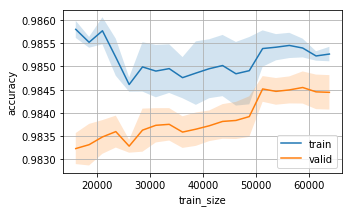

In [175]:
%%time
train_sizes = np.linspace(0.25, 1, 20)
estimator = svm_grid_searcher2.best_estimator_
n_train, val_train, val_test = learning_curve(estimator=estimator, X=X_train_150, y=y_binary_128.astype(int),
                                              train_sizes=train_sizes, n_jobs=-1, random_state=17, cv=skf)
plt.figure(figsize=[5,3]);
plot_learning_curve(val_train, val_test, n_train, xlabel='train_size', ylabel='accuracy'); plt.grid()

**Качество классификации** пользователя 128 при варьировании размера выборки для кросс-валидации различается для тренировочной и тестовой выборки. По тестовой кривой обучения видно, что наилучшее качество классификации достигается, когда размер выборки для кросс-валидации больше 50000/70000=0.714... от размера X_train_150... Однако такое представление данных (только для пользователя 128) не увеличило сколько-нибудь заметно долю правильных ответов: User 128, CV score: 0.9848404849077502 - получили при кросс-валидации ранее, val_test.max()=0.9849551155734885 - при классификации "user128-vs-All", разница практической значимости не имеет. Вывод - новые размеченные данные при той же постановке задачи алгоритму не помогут.

**Таким образом,** для решения задачи классификации было проверено несколько различных моделей (метод kNN, RandomForest, LogisticRegression и SVM), для логистической регрессии и SVM были найдены оптимальные (квазиоптимальные) значения параметра регуляризации `C`, были посчитаны доли правильных ответов (оценка качества классификации) на кросс-валидации и на отложенной выборке, построены кривые валидации и обучения, проверено влияние длины сессии и ширины окна на качество классификации и сделаны первые попытки идентификации пользователей.

## 5. Соревнование Kaggle "Catch Me If You Can"

**В данном разделе** будет осуществлено обучение модели с помощью стохастического градиентного спуска (классификатор `Scikit-learn SGDClassifier`, который работает намного быстрее на больших выборках, чем алгоритмы, которые были протестированы ранее). Исследованные алгоритмы классификации будут опробованы (в какой-то части) на данных [соревнования](https://inclass.kaggle.com/c/catch-me-if-you-can-intruder-detection-through-webpage-session-tracking2) Kaggle по идентификации пользователей.

**Считывание данных** [соревнования](https://inclass.kaggle.com/c/catch-me-if-you-can-intruder-detection-through-webpage-session-tracking2) в DataFrame train_df и test_df (обучающая и тестовая выборки):

In [177]:
train_df = pd.read_csv(os.path.join(PATH_TO_DATA, 'train_sessions.csv'), index_col='session_id')
test_df = pd.read_csv(os.path.join(PATH_TO_DATA, 'test_sessions.csv'), index_col='session_id')

In [178]:
train_df.head(3)

,site1,time1,site2,time2,site3,time3,site4,time4,site5,time5,site6,time6,site7,time7,site8,time8,site9,time9,site10,time10,target
session_id,,,,,,,,,,,,,,,,,,,,,
1,718,2014-02-20 10:02:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,890,2014-02-22 11:19:50,941.0,2014-02-22 11:19:50,3847.0,2014-02-22 11:19:51,941.0,2014-02-22 11:19:51,942.0,2014-02-22 11:19:51,3846.0,2014-02-22 11:19:51,3847.0,2014-02-22 11:19:52,3846.0,2014-02-22 11:19:52,1516.0,2014-02-22 11:20:15,1518.0,2014-02-22 11:20:16,0
3,14769,2013-12-16 16:40:17,39.0,2013-12-16 16:40:18,14768.0,2013-12-16 16:40:19,14769.0,2013-12-16 16:40:19,37.0,2013-12-16 16:40:19,39.0,2013-12-16 16:40:19,14768.0,2013-12-16 16:40:20,14768.0,2013-12-16 16:40:21,14768.0,2013-12-16 16:40:22,14768.0,2013-12-16 16:40:24,0


In [179]:
test_df.head(3)

,site1,time1,site2,time2,site3,time3,site4,time4,site5,time5,site6,time6,site7,time7,site8,time8,site9,time9,site10,time10
session_id,,,,,,,,,,,,,,,,,,,,
1,29,2014-10-04 11:19:53,35.0,2014-10-04 11:19:53,22.0,2014-10-04 11:19:54,321.0,2014-10-04 11:19:54,23.0,2014-10-04 11:19:54,2211.0,2014-10-04 11:19:54,6730.0,2014-10-04 11:19:54,21.0,2014-10-04 11:19:54,44582.0,2014-10-04 11:20:00,15336.0,2014-10-04 11:20:00
2,782,2014-07-03 11:00:28,782.0,2014-07-03 11:00:53,782.0,2014-07-03 11:00:58,782.0,2014-07-03 11:01:06,782.0,2014-07-03 11:01:09,782.0,2014-07-03 11:01:10,782.0,2014-07-03 11:01:23,782.0,2014-07-03 11:01:29,782.0,2014-07-03 11:01:30,782.0,2014-07-03 11:01:53
3,55,2014-12-05 15:55:12,55.0,2014-12-05 15:55:13,55.0,2014-12-05 15:55:14,55.0,2014-12-05 15:56:15,55.0,2014-12-05 15:56:16,55.0,2014-12-05 15:56:17,55.0,2014-12-05 15:56:18,55.0,2014-12-05 15:56:19,1445.0,2014-12-05 15:56:33,1445.0,2014-12-05 15:56:36


**Объединение обучающей** и тестовой выборок – это понадобится, чтоб вместе потом привести их к разреженному формату:

In [180]:
train_test_df = pd.concat([train_df, test_df])

В обучающей выборке видны следующие признаки:
    - site1 – индекс первого посещенного сайта в сессии
    - time1 – время посещения первого сайта в сессии
    - ...
    - site10 – индекс 10-го посещенного сайта в сессии
    - time10 – время посещения 10-го сайта в сессии
    - user_id – ID пользователя
    
Сессии пользователей выделены таким образом, что они не могут быть длинее получаса или 10 сайтов. То есть сессия считается оконченной либо когда пользователь посетил 10 сайтов подряд, либо когда сессия заняла по времени более 30 минут. 

**Посмотрим на статистику признаков.**

Пропуски возникают там, где сессии короткие (менее 10 сайтов). Скажем, если человек 1 января 2015 года посетил *vk.com* в 20:01, потом *yandex.ru* в 20:29, затем *google.com* в 20:33, то первая его сессия будет состоять только из двух сайтов (site1 – ID сайта *vk.com*, time1 – 2015-01-01 20:01:00, site2 – ID сайта  *yandex.ru*, time2 – 2015-01-01 20:29:00, остальные признаки – NaN), а начиная с *google.com* пойдет новая сессия, потому что уже прошло более 30 минут с момента посещения *vk.com*.

In [181]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 253561 entries, 1 to 253561
Data columns (total 21 columns):
site1     253561 non-null int64
time1     253561 non-null object
site2     250098 non-null float64
time2     250098 non-null object
site3     246919 non-null float64
time3     246919 non-null object
site4     244321 non-null float64
time4     244321 non-null object
site5     241829 non-null float64
time5     241829 non-null object
site6     239495 non-null float64
time6     239495 non-null object
site7     237297 non-null float64
time7     237297 non-null object
site8     235224 non-null float64
time8     235224 non-null object
site9     233084 non-null float64
time9     233084 non-null object
site10    231052 non-null float64
time10    231052 non-null object
target    253561 non-null int64
dtypes: float64(9), int64(2), object(10)
memory usage: 42.6+ MB


In [182]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82797 entries, 1 to 82797
Data columns (total 20 columns):
site1     82797 non-null int64
time1     82797 non-null object
site2     81308 non-null float64
time2     81308 non-null object
site3     80075 non-null float64
time3     80075 non-null object
site4     79182 non-null float64
time4     79182 non-null object
site5     78341 non-null float64
time5     78341 non-null object
site6     77566 non-null float64
time6     77566 non-null object
site7     76840 non-null float64
time7     76840 non-null object
site8     76151 non-null float64
time8     76151 non-null object
site9     75484 non-null float64
time9     75484 non-null object
site10    74806 non-null float64
time10    74806 non-null object
dtypes: float64(9), int64(1), object(10)
memory usage: 13.3+ MB


**В обучающей выборке** – 2297 сессий одного пользователя (Alice) и 251264 сессий – других пользователей, не Элис. Дисбаланс классов очень сильный, и смотреть на долю верных ответов (accuracy) непоказательно.

In [183]:
train_df['target'].value_counts()

0    251264
1      2297
Name: target, dtype: int64

**Пока для прогноза** будут использоваться только индексы посещенных сайтов. Индексы нумеровались с 1, так что пропуски (NaN) заменяются на нули.

In [184]:
train_test_df_sites = train_test_df[['site%d' % i for i in range(1, 11)]].fillna(0).astype('int')

In [185]:
train_test_df_sites.head(3)

,site1,site2,site3,site4,site5,site6,site7,site8,site9,site10
session_id,,,,,,,,,,
1,718,0,0,0,0,0,0,0,0,0
2,890,941,3847,941,942,3846,3847,3846,1516,1518
3,14769,39,14768,14769,37,39,14768,14768,14768,14768


**Далее создаются** разреженные матрицы *X_train_sparse* и *X_test_sparse* аналогично тому, как это делалось ранее. Для этого используется объединенная матрица *train_test_df_sites*, которая потом разделяется обратно на обучающую и тестовую части.<br>
В сессиях меньше 10 сайтов остались нули, так что первый признак (сколько раз попался 0) по смыслу отличен от остальных (сколько раз попался сайт с индексом $i$). Поэтому первый столбец разреженной матрицы будет удален.<br>
Также в отдельный вектор *y* выделяются ответы на обучающей выборке.

In [187]:
train_test_sparse = prepare_sparse_data(train_test_df_sites.values)
X_train_sparse = train_test_sparse[:train_df.shape[0], :]
X_test_sparse = train_test_sparse[train_df.shape[0]:, :]
y = train_df['target'].values

In [188]:
print(X_train_sparse.shape[0], X_train_sparse.shape[1], X_test_sparse.shape[0], X_test_sparse.shape[1])

253561 48371 82797 48371


**Сохранение в pickle-файлы** объектов *X_train_sparse*, *X_test_sparse* и <i>y</i> (последний – в файл *kaggle_data/train_target.pkl*):

In [191]:
with open(os.path.join(PATH_TO_DATA, 'X_train_sparse.pkl'), 'wb') as X_train_sparse_pkl:
    pickle.dump(X_train_sparse, X_train_sparse_pkl, protocol=2)
with open(os.path.join(PATH_TO_DATA, 'X_test_sparse.pkl'), 'wb') as X_test_sparse_pkl:
    pickle.dump(X_test_sparse, X_test_sparse_pkl, protocol=2)
with open(os.path.join(PATH_TO_DATA, 'train_target.pkl'), 'wb') as train_target_pkl:
    pickle.dump(y, train_target_pkl, protocol=2)

**Обучающая выборка** разбивается на 2 части в пропорции 7/3, без перемешивания. Исходные данные упорядочены по времени, тестовая выборка по времени четко отделена от обучающей, это же соблюдается и здесь.

In [193]:
train_share = int(.7 * X_train_sparse.shape[0])
X_train, y_train = X_train_sparse[:train_share, :], y[:train_share]
X_valid, y_valid  = X_train_sparse[train_share:, :], y[train_share:]

**Создается объект `sklearn.linear_model.SGDClassifier`** с логистической функцией потерь и параметром *random_state*=17. Остальные параметры остаются по умолчанию, только *n_jobs*=-1. Далее модель обучается на выборке `(X_train, y_train)`, делается прогноз в виде предсказанных вероятностей того, что это сессия Элис, на отложенной выборке *(X_valid, y_valid)*, подсчитывается ROC AUC логистической регрессии, обученной с помощью стохастического градиентного спуска, на отложенной выборке.

In [194]:
sgd_logit = SGDClassifier(loss='log', random_state=17, n_jobs=-1)
sgd_logit.fit(X_train, y_train) # обучение классификатора
logit_valid_pred_proba = sgd_logit.predict_proba(X_valid) # прогноз вероятностей того, что это сессия Элис
np.round(roc_auc_score(y_valid, logit_valid_pred_proba[:,1]), 3)

0.934

**Далее делается прогноз** в виде предсказанных вероятностей отнесения к классу 1 (эта сессия - пользователя Элис) для тестовой выборки с помощью той же *sgd_logit*, обученной уже на всей обучающей выборке (а не на 70%).

In [195]:
%%time
sgd_logit.fit(X_train_sparse, y) # обучение классификатора
logit_test_pred_proba = sgd_logit.predict_proba(X_test_sparse)[:,1] # прогноз вероятностей того, что это сессия Элис

Wall time: 698 ms


**Этот ответ (прогноз вероятностей сессии Элис на тестовой выборке)** был записан в файл и послан на Kaggle. Команде (из одного человека) на Kaggle было присвоено название "[YDF & MIPT] Coursera Lubashev Yuri", эту посылку можно идентифицировать на [лидерборде](https://inclass.kaggle.com/c/catch-me-if-you-can-intruder-detection-through-webpage-session-tracking2/leaderboard/public).<br>
Полученный результат соответствует бейзлайну "SGDCLassifer" на лидерборде.

In [196]:
def write_to_submission_file(predicted_labels, out_file, target='target', index_label="session_id"):
    # turn predictions into data frame and save as csv file
    predicted_df = pd.DataFrame(predicted_labels, index = np.arange(1, predicted_labels.shape[0] + 1), columns=[target])
    predicted_df.to_csv(out_file, index_label=index_label)

In [197]:
with open(os.path.join(PATH_TO_DATA, 'kaggle_submission.csv'), 'w') as out_file:
    write_to_submission_file(logit_test_pred_proba, out_file)

После загрузки на кэггл (наименование команды: [YDF & MIPT] Coursera Lubashev Yuri), полученная оценка (score) составила 0.91273. Это соответствует бейзлайну "SGDCLassifer", но **меньше (равно)** установленных порогов "sgd_logit_benchmark.csv 0.91273" и "Logit +3 features 0.92784". Попробуем решение, подсказанное автором курса:

In [198]:
sites = ['site%s' % i for i in range(1, 11)]
train_df[sites].fillna(0).astype('int').to_csv('train_sessions_text.txt', sep=' ', index=None, header=None)
test_df[sites].fillna(0).astype('int').to_csv('test_sessions_text.txt', sep=' ', index=None, header=None)

In [199]:
%%time
cv = CountVectorizer(ngram_range=(1, 3), max_features=50000)
with open('train_sessions_text.txt') as inp_train_file:
    X_train = cv.fit_transform(inp_train_file)
with open('test_sessions_text.txt') as inp_test_file:
    X_test = cv.transform(inp_test_file)
X_train.shape, X_test.shape

Wall time: 18.2 s


In [201]:
y_train = train_df['target'].astype('int').values
time_split = TimeSeriesSplit(n_splits=10)
logit = LogisticRegression(C=1, random_state=17, solver='liblinear')

In [202]:
%%time
cv_scores = cross_val_score(logit, X_train, y_train, cv=time_split, 
                            scoring='roc_auc', n_jobs=1) # hangs with n_jobs > 1, and locally this runs much faster

Wall time: 1min 31s


In [203]:
logit.fit(X_train, y_train) # обучение классификатора
logit_test_pred = logit.predict_proba(X_test)[:, 1] # прогноз вероятностей, что сессия - пользователя Элис
write_to_submission_file(logit_test_pred, 'subm1.csv') # запись в файл для посылки на Kaggle

**После загрузки** на кэггл (команда: [YDF & MIPT] Coursera Lubashev Yuri), полученная оценка (score) составила 0.91288. Это **больше** установленного порога "sgd_logit_benchmark.csv 0.91273".<br>
Применение других способов улучшить результат привело не к значимому улучшению, а к ухудшению качества классификации. Были перепробованы другие алгоритмы классификации (из рассмотренных ранее), проведена нормализация признаков (деление на мат.ожидание и вычитание СКО), - все это приводило только к снижению оценки (score). Воспользоваться же новыми признаками (*session_timespan, #unique_sites, start_hour, day_of_week*), синтезированными в разделе 3, тоже представляется затруднительным, поскольку для нового датасета, скачанного с сайта Kaggle, необходимо эти признаки синтезировать заново (в датасете кэггл есть только две целевых переменных - 0 и 1, как автор предполагал их сопоставить с признаками, полученными ранее - непонятно?), и тут возникает ряд проблем, например такого рода: для некоторых объектов в выборке есть только одно время (остальные метки стоят в NaN) - как считать длительность сессии *session_timespan*? Ну и т.д.

**Таким образом**, было осуществлено обучение модели (логистического регрессора) с помощью стохастического градиентного спуска (классификатор `Scikit-learn SGDClassifier`). Данный алгоритм классификации был опробован на данных [соревнования](https://inclass.kaggle.com/c/catch-me-if-you-can-intruder-detection-through-webpage-session-tracking2) Kaggle по идентификации пользователя Элис, с результатом (с учетом дополнительных преобразований над данными), равным 0.91288. Это означает, что данная модель обучена все же недостаточно хорошо, т.е., она распознает пользователя Элис всего в 91% случаев. При этом, с учетом установленного бэйзлайна для этих данных, такую модель использовать для идентификации пользователя можно.

## 6. Применение пакета Vowpal Wabbit к данным

Далее для решения задачи идентификации пользователя используется библиотека Vowpal Wabbit, она апробируется на данных по посещению сайтов.

### 6.1 Подготовка данных

**Есть предположение,** что в задаче соревнования при бинарной классификации веб-сессий не будет ощутима разница между ранее примененными алгоритмами и VW – как по качеству, так и по скорости работы, поэтому преимущества использования VW будут рассматриваться для задачи классификации на 400 классов. Исходные данные все те же самые, но выделено 400 пользователей, и решается задача их идентификации. Данные берутся [отсюда](https://inclass.kaggle.com/c/identify-me-if-you-can4/data) – файлы `train_sessions_400users.csv` и `test_sessions_400users.csv`.

**Загрузка обучающей** и тестовой выборки. Можно заметить, что тестовые сессии здесь по времени четко отделены от сессий в обучающей выборке.

In [205]:
train_df_400 = pd.read_csv(os.path.join(PATH_TO_DATA,'train_sessions_400users.csv'), index_col='session_id')
test_df_400 = pd.read_csv(os.path.join(PATH_TO_DATA,'test_sessions_400users.csv'), index_col='session_id')

In [206]:
train_df_400.head(3)

,site1,time1,site2,time2,site3,time3,site4,time4,site5,time5,site6,time6,site7,time7,site8,time8,site9,time9,site10,time10,user_id
session_id,,,,,,,,,,,,,,,,,,,,,
1,23713,2014-03-24 15:22:40,23720.0,2014-03-24 15:22:48,23713.0,2014-03-24 15:22:48,23713.0,2014-03-24 15:22:54,23720.0,2014-03-24 15:22:54,23713.0,2014-03-24 15:22:55,23713.0,2014-03-24 15:23:01,23713.0,2014-03-24 15:23:03,23713.0,2014-03-24 15:23:04,23713.0,2014-03-24 15:23:05,653
2,8726,2014-04-17 14:25:58,8725.0,2014-04-17 14:25:59,665.0,2014-04-17 14:25:59,8727.0,2014-04-17 14:25:59,45.0,2014-04-17 14:25:59,8725.0,2014-04-17 14:26:01,45.0,2014-04-17 14:26:01,5320.0,2014-04-17 14:26:18,5320.0,2014-04-17 14:26:47,5320.0,2014-04-17 14:26:48,198
3,303,2014-03-21 10:12:24,19.0,2014-03-21 10:12:36,303.0,2014-03-21 10:12:54,303.0,2014-03-21 10:13:01,303.0,2014-03-21 10:13:24,303.0,2014-03-21 10:13:36,303.0,2014-03-21 10:13:54,309.0,2014-03-21 10:14:01,303.0,2014-03-21 10:14:06,303.0,2014-03-21 10:14:24,34


In [207]:
test_df_400.head(3)

,site1,time1,site2,time2,site3,time3,site4,time4,site5,time5,site6,time6,site7,time7,site8,time8,site9,time9,site10,time10
session_id,,,,,,,,,,,,,,,,,,,,
1,9,2014-10-04 12:24:43,304.0,2014-10-04 12:25:34,308.0,2014-10-04 12:28:33,307.0,2014-10-04 12:28:33,91.0,2014-10-04 12:28:33,308.0,2014-10-04 12:28:34,312.0,2014-10-04 12:30:31,300.0,2014-10-04 12:31:30,305.0,2014-10-04 12:32:31,309.0,2014-10-04 12:34:31
2,838,2014-12-02 09:20:37,504.0,2014-12-02 09:20:38,68.0,2014-12-02 09:20:38,11.0,2014-12-02 09:20:38,838.0,2014-12-02 09:20:38,11.0,2014-12-02 09:20:40,838.0,2014-12-02 09:20:41,886.0,2014-12-02 09:20:42,27.0,2014-12-02 09:20:42,305.0,2014-12-02 09:20:42
3,190,2014-10-01 09:27:38,192.0,2014-10-01 09:27:38,8.0,2014-10-01 09:27:38,189.0,2014-10-01 09:27:38,191.0,2014-10-01 09:27:39,189.0,2014-10-01 09:27:39,190.0,2014-10-01 09:27:39,2375.0,2014-10-01 09:27:39,192.0,2014-10-01 09:27:39,8.0,2014-10-01 09:27:39


**В обучающей выборке** 182793 сессий, в тестовой – 46473, и сессии действительно принадлежат 400 различным пользователям:

In [208]:
train_df_400.shape, test_df_400.shape, train_df_400['user_id'].nunique()

((182793, 21), (46473, 20), 400)

**Для применения Vowpal Wabbit** необходимо, чтобы метки классов были распределены от 1 до K, где K – число классов в задаче классификации (в данном случае – 400). Поэтому применяется `LabelEncoder`, к результату работы которого затем добавляется +1 (`LabelEncoder` переводит метки в диапазон от 0 до K-1). Далее будет применено обратное преобразование.

In [209]:
y = train_df_400['user_id']
class_encoder = LabelEncoder()
y_for_vw = class_encoder.fit_transform(train_df_400['user_id']) + 1

**Далее будет сравниваться** VW с SGDClassifier и с логистической регрессией. Всем этим моделям нужна предобработка входных данных. Для sklearn-моделей будут подготовлены разреженные матрицы по аналогии с тем, как это было сделано в разделе 5, с выполнением следующих операций:
- объединение обучающей и тестовой выборок;
- выбор из исходных данных только сайтов (признаки от 'site1' до 'site10');
- замена пропусков (NaN) на нули (сайты нумеровались с 1);
- перевод матриц в разреженный формат `csr_matrix`;
- разбиение матриц обратно на обучающую и тестовую части.

In [210]:
train_test_df_400 = pd.concat([train_df_400, test_df_400], sort=False)
sites = ['site' + str(i) for i in range(1, 11)]
train_test_df_sites_400 = train_test_df_400[['site%d' % i for i in range(1, 11)]].fillna(0).astype('int')

In [211]:
train_test_df_sites_400.head(3)

,site1,site2,site3,site4,site5,site6,site7,site8,site9,site10
session_id,,,,,,,,,,
1,23713,23720,23713,23713,23720,23713,23713,23713,23713,23713
2,8726,8725,665,8727,45,8725,45,5320,5320,5320
3,303,19,303,303,303,303,303,309,303,303


In [212]:
train_test_sparse_400 = prepare_sparse_data(train_test_df_sites_400.values)
X_train_sparse = train_test_sparse_400[:train_df_400.shape[0], :]
X_test_sparse = train_test_sparse_400[train_df_400.shape[0]:, :]
y = train_df_400['user_id'].values

### 6.2 Валидация по отложенной выборке

**Выделяются обучающая** (70%) и отложенная (30%) части исходной обучающей выборки. Данные не перемешиваются, учитывается, что сессии отсортированы по времени:

In [213]:
train_share = int(.7 * train_df_400.shape[0])
train_df_part = train_df_400[sites].iloc[:train_share, :].fillna(0).astype('int')
valid_df = train_df_400[sites].iloc[train_share:, :].fillna(0).astype('int')
X_train_part_sparse = X_train_sparse[:train_share, :]
X_valid_sparse = X_train_sparse[train_share:, :]

In [214]:
y_train_part = y[:train_share]
y_valid = y[train_share:]
y_train_part_for_vw = y_for_vw[:train_share]
y_valid_for_vw = y_for_vw[train_share:]

**Реализуется функция `arrays_to_vw`,** переводящая обучающую выборку в формат Vowpal Wabbit.

Входные параметры:
 - X – матрица `NumPy` (обучающая выборка);
 - y (необяз.) - вектор ответов (`NumPy`). Необязателен, поскольку тестовая матрица будет обрабатываться этой же функцией;
 - train – флаг, True в случае обучающей выборки, False – в случае тестовой выборки;
 - out_file – путь к файлу .vw, в который будет произведена запись.
 
Детали:
- делается проход по всем строкам матрицы `X` и записываются через пробел все значения, с предварительным добавлением впереди нужной метки класса из вектора `y` и знака-разделителя `|`;
- в тестовой выборке на месте меток целевого класса можно указываются произвольные (в данном случае - 1).

In [215]:
def arrays_to_vw(X, y=None, train=True, out_file='tmp.vw'):
    ls = []
    for i in range(X.shape[0]):
        if train:
            ls += [str(y[i]) + ' | ' + ' '.join(str(int(X[i,j])) for j in range(X.shape[1])) + '\n']
        else:
            ls += ['1 | ' + ' '.join(str(int(X[i,j])) for j in range(X.shape[1])) + '\n']
    with open(out_file, 'wb') as vw_data:
        for row in ls:
            vw_data.write(row.encode('utf8'))

**Применение написанной функции** к части обучащей выборки `(train_df_part, y_train_part_for_vw)`, к отложенной выборке `(valid_df, y_valid_for_vw)`, ко всей обучающей выборке и ко всей тестовой выборке:

In [216]:
%%time
# будет 4 вызова
arrays_to_vw(train_df_part.values, y_train_part_for_vw, train=True, out_file='train_part.vw')
arrays_to_vw(valid_df.values, y_valid_for_vw, train=True, out_file='valid.vw')
arrays_to_vw(train_df_400[sites].fillna(0).astype('int').values, y_for_vw, train=True, out_file='train.vw')
arrays_to_vw(test_df_400[sites].fillna(0).astype('int').values, train=False, out_file='test.vw')

Wall time: 4.24 s


In [219]:
#%system type train_part.vw

**Далее выполняется обучение** модели Vowpal Wabbit на выборке `train_part.vw`. Указывается, что решается задача классификации с 400 классами (`--oaa`), что делается 3 прохода по выборке (`--passes`). Задается кэш-файл (`--cache_file`, можно просто указать флаг `-c`), так VW будет быстрее делать все следующие после первого проходы по выборке (прошлый кэш-файл удаляется с помощью аргумента `-k`). Также указывается значение параметра `b`=26. Это число бит, используемых для хэширования, в данном случае нужно больше, чем 18 по умолчанию. Наконец, указывается (для воспроизводимости) `random_seed`=17. Остальные параметры не меняются.

In [220]:
train_part_vw = os.path.join(PATH_TO_DATA, 'train_part.vw')
valid_vw = os.path.join(PATH_TO_DATA, 'valid.vw')
train_vw = os.path.join(PATH_TO_DATA, 'train.vw')
test_vw = os.path.join(PATH_TO_DATA, 'test.vw')
model = os.path.join(PATH_TO_DATA, 'vw_model.vw')
pred = os.path.join(PATH_TO_DATA, 'vw_pred.csv')

In [235]:
%%time
!vw -d train_part.vw --oaa 400 --passes 3 -c -b 26 --random_seed 17 -f train_part_model.vw

final_regressor = train_part_model.vw
Num weight bits = 26
learning rate = 0.5
initial_t = 0
power_t = 0.5
decay_learning_rate = 1
using cache_file = train_part.vw.cache
ignoring text input in favor of cache input
num sources = 1
average  since         example        example  current  current  current
loss     last          counter         weight    label  predict features
1.000000 1.000000            1            1.0      262        1       11
1.000000 1.000000            2            2.0       82      262       11
1.000000 1.000000            4            4.0      241      262       11
1.000000 1.000000            8            8.0      352      262       11
1.000000 1.000000           16           16.0      135       16       11
1.000000 1.000000           32           32.0       71      112       11
0.968750 0.937500           64           64.0      358      231       11
0.976563 0.984375          128          128.0      348      346       11
0.941406 0.906250          256          

Wall time: 52.5 s


**Сохранение прогнозов** на выборке *valid.vw* в файл *vw_valid_pred.csv*:

In [231]:
%%time
!vw -d valid.vw -i train_part_model.vw -t -p vw_valid_pred.csv

only testing
predictions = vw_valid_pred.csv
Num weight bits = 26
learning rate = 0.5
initial_t = 0
power_t = 0.5
using no cache
Reading datafile = valid.vw
num sources = 1
average  since         example        example  current  current  current
loss     last          counter         weight    label  predict features
1.000000 1.000000            1            1.0        4      188       11
1.000000 1.000000            2            2.0      160      220       11
0.750000 0.500000            4            4.0      143      143       11
0.750000 0.750000            8            8.0      247      247       11
0.687500 0.625000           16           16.0      341       30       11
0.593750 0.500000           32           32.0      237      237       11
0.609375 0.625000           64           64.0      178      178       11
0.640625 0.671875          128          128.0      132      228       11
0.656250 0.671875          256          256.0       14       14       11
0.646484 0.636719       

Wall time: 4.27 s


**Считывание прогнозов** *vw_valid_pred.csv* из файла, оценка доли правильных ответов на отложенной части:

In [232]:
vw_valid_pred = pd.read_csv('vw_valid_pred.csv', header=None).values
vw_valid_acc = accuracy_score(y_valid_for_vw, vw_valid_pred) # оценка качества на отложенной выборке
print(round(vw_valid_acc, 3))

0.345


**Далее обучается** `SGDClassifier` (3 прохода по выборке, логистическая функция потерь) и `LogisticRegression` на 70% разреженной обучающей выборки – `(X_train_part_sparse, y_train_part)`, делается прогноз для отложенной выборки `(X_valid_sparse, y_valid)` и подсчитывается доля верных ответов. На обучение логистической регрессии потребуется длительное время.

In [233]:
logit = LogisticRegression(random_state=17, n_jobs=-1)
sgd_logit = SGDClassifier(loss='log', max_iter=3, random_state=17, n_jobs=-1)

In [234]:
%%time
logit.fit(X_train_part_sparse, y_train_part)

Wall time: 25min 40s


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn', n_jobs=-1,
          penalty='l2', random_state=17, solver='warn', tol=0.0001,
          verbose=0, warm_start=False)

In [236]:
%%time
sgd_logit.fit(X_train_part_sparse, y_train_part)

Wall time: 8.4 s


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=3,
       n_iter=None, n_iter_no_change=5, n_jobs=-1, penalty='l2',
       power_t=0.5, random_state=17, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [237]:
logit_pred = logit.predict(X_valid_sparse)
sgd_logit_pred = sgd_logit.predict(X_valid_sparse)

**Доли правильных ответов** на отложенной выборке для Vowpal Wabbit, SGD и логистической регрессии, соответственно:

In [241]:
vw_valid_acc = accuracy_score(y_valid_for_vw, vw_valid_pred) # оценка качества на отложенной выборке
sgd_valid_acc = accuracy_score(y_valid, sgd_logit_pred)
logit_valid_acc = accuracy_score(y_valid, logit_pred)
print('Доли правильных ответов на отложенной выборке для: Vowpal Wabbit = {},\n SGD = {} и логистической регрессии = {}'.format(vw_valid_acc, sgd_valid_acc, logit_valid_acc))

Доли правильных ответов на отложенной выборке для: Vowpal Wabbit = 0.34541741128414605,
 SGD = 0.2910755315657026 и логистической регрессии = 0.36292352018673185


### 6.3. Валидация по тестовой выборке (Public Leaderboard)

**Обучается модель** VW с теми же параметрами на всей обучающей выборке – *train.vw*.

In [242]:
%%time
!vw -d train.vw --oaa 400 --passes 3 -c -b 26 --random_seed 17 -f train_model.vw

final_regressor = train_model.vw
Num weight bits = 26
learning rate = 0.5
initial_t = 0
power_t = 0.5
decay_learning_rate = 1
using cache_file = train.vw.cache
ignoring text input in favor of cache input
num sources = 1
average  since         example        example  current  current  current
loss     last          counter         weight    label  predict features
1.000000 1.000000            1            1.0      262        1       11
1.000000 1.000000            2            2.0       82      262       11
1.000000 1.000000            4            4.0      241      262       11
1.000000 1.000000            8            8.0      352      262       11
1.000000 1.000000           16           16.0      135       16       11
1.000000 1.000000           32           32.0       71      112       11
0.968750 0.937500           64           64.0      358      231       11
0.976563 0.984375          128          128.0      348      346       11
0.941406 0.906250          256          256.0     

Wall time: 55.7 s


**Прогноз для** тестовой выборки:

In [243]:
%%time
!vw -d test.vw -i train_model.vw -t -p vw_test_pred.csv

only testing
predictions = vw_test_pred.csv
Num weight bits = 26
learning rate = 0.5
initial_t = 0
power_t = 0.5
using no cache
Reading datafile = test.vw
num sources = 1
average  since         example        example  current  current  current
loss     last          counter         weight    label  predict features
1.000000 1.000000            1            1.0        1       90       11
1.000000 1.000000            2            2.0        1       21       11
1.000000 1.000000            4            4.0        1      265       11
1.000000 1.000000            8            8.0        1      137       11
1.000000 1.000000           16           16.0        1      273       11
1.000000 1.000000           32           32.0        1      384       11
1.000000 1.000000           64           64.0        1      139       11
1.000000 1.000000          128          128.0        1       85       11
1.000000 1.000000          256          256.0        1       25       11
0.994141 0.988281         

Wall time: 2.77 s


**Сохранение прогноза** в файл, с обратным преобразованием меток (был LabelEncoder и потом +1 к меткам) и последующее направление решения на Kaggle:

In [244]:
def write_to_submission_file(predicted_labels, out_file,
                             target='user_id', index_label="session_id"):
    # turn predictions into data frame and save as csv file
    predicted_df = pd.DataFrame(predicted_labels,
                                index = np.arange(1, predicted_labels.shape[0] + 1),
                                columns=[target])
    predicted_df.to_csv(out_file, index_label=index_label)

In [245]:
y_test = pd.read_csv('vw_test_pred.csv', header=None).values - 1
vw_pred = class_encoder.inverse_transform(y_test)
write_to_submission_file(vw_pred, os.path.join(PATH_TO_DATA, 'vw_400_users.csv'))

**Выполнение тех же самых** процедур для SGD и логистической регрессии (<font color=crimson>обучение логистической регрессии производится в течение длительного времени!</font>):

In [246]:
logit.fit(X_train_sparse, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn', n_jobs=-1,
          penalty='l2', random_state=17, solver='warn', tol=0.0001,
          verbose=0, warm_start=False)

In [247]:
# sgd_logit.fit(X_train_sparse, y) - так надо было сделать, но авторы курса, похоже, забыли переобучить модель
# и поэтому обучать ее надо на частичной трэйновой выборке
sgd_logit.fit(X_train_part_sparse, y_train_part)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=3,
       n_iter=None, n_iter_no_change=5, n_jobs=-1, penalty='l2',
       power_t=0.5, random_state=17, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [248]:
logit_test_pred = logit.predict(X_test_sparse)
sgd_logit_test_pred = sgd_logit.predict(X_test_sparse)
write_to_submission_file(logit_test_pred, os.path.join(PATH_TO_DATA, 'logit_400_users.csv'))
write_to_submission_file(sgd_logit_test_pred, os.path.join(PATH_TO_DATA, 'sgd_400_users.csv'))

**После загрузки на Kaggle** были посчитаны доли правильных ответов на публичной части (public leaderboard) тестовой выборки [этого](https://inclass.kaggle.com/c/identify-me-if-you-can4) соревнования.<br>
Доли правильных ответов на публичной части тестовой выборки (public leaderboard) оказались равны для Vowpal Wabbit, SGD и логистической регрессии, соответственно:

In [249]:
vw_lb_score, sgd_lb_score, logit_lb_score = 0.18768, 0.17855, 0.19887

Таким образом, была изучена библиотека Vowpal Wabbit, с ее помощью обучена модель, сделаны оценки качества классификации и для сравнения они были сделаны для двух других моделей: SGD и логистического регрессора (logit). Можно отметить, что по скорости обучения VW и SGD значительно выигрывают у logit, но качество классификации оказывается выше все-таки у logit-а.

## Выводы

Итак, в ходе работы над проектом по идентификации пользователей, были осуществлены предобработка и первичный (в т.ч., визуальный) анализ входных данных, выбор лучшего из нескольких классификаторов, обучение моделей классификации и получение оценок по метрике ROC-AUC на платформе Kaggle. По итогам работы выяснилось, что наилучшей моделью для классификации можно считать логистический регрессор (при этом его обучение можно производить с помощью SGD-classifier, с указанием log-функции потерь), на соревновании по идентификации пользователя Элис он дает результаты прогноза данного пользователя с точностью до 91%. Для улучшения качества классификации, пожалуй, можно попробовать еще выполнить блендинг (стэкинг, применение определенным образом нескольких классификаторов, как предлагал автор курса), возможно, это позволит улучшить долю верно предсказываемых меток для идентифицируемых пользователей.